In [1]:
#run: pip install openquantumcomputing
import sys
sys.path.insert(0, '/home/franzf/OpenQuantumComputing/OpenQuantumComputing/')
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

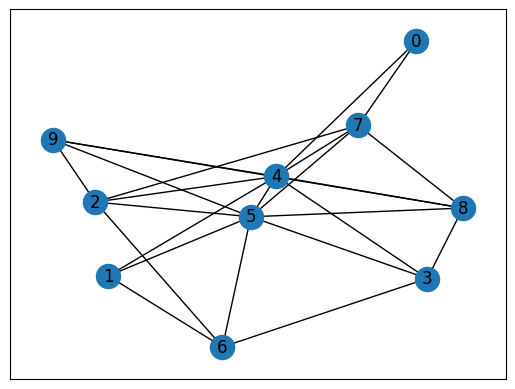

In [3]:
numV=10
G = nx.read_gml("../../data/sample_graphs/w_ba_n"+str(numV)+"_k4_0.gml")
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)

In [4]:
params={'G': G}
qaoamc = QAOAMaxCut(params=params)

In [5]:
import itertools
costs=[]
for s in [''.join(i) for i in itertools.product('01', repeat =numV)]:
    tmp=-qaoamc.cost(s)
    costs.append(tmp)
mincost=min(costs)
print("minimum cost=",mincost)

minimum cost= -8.657714089848158


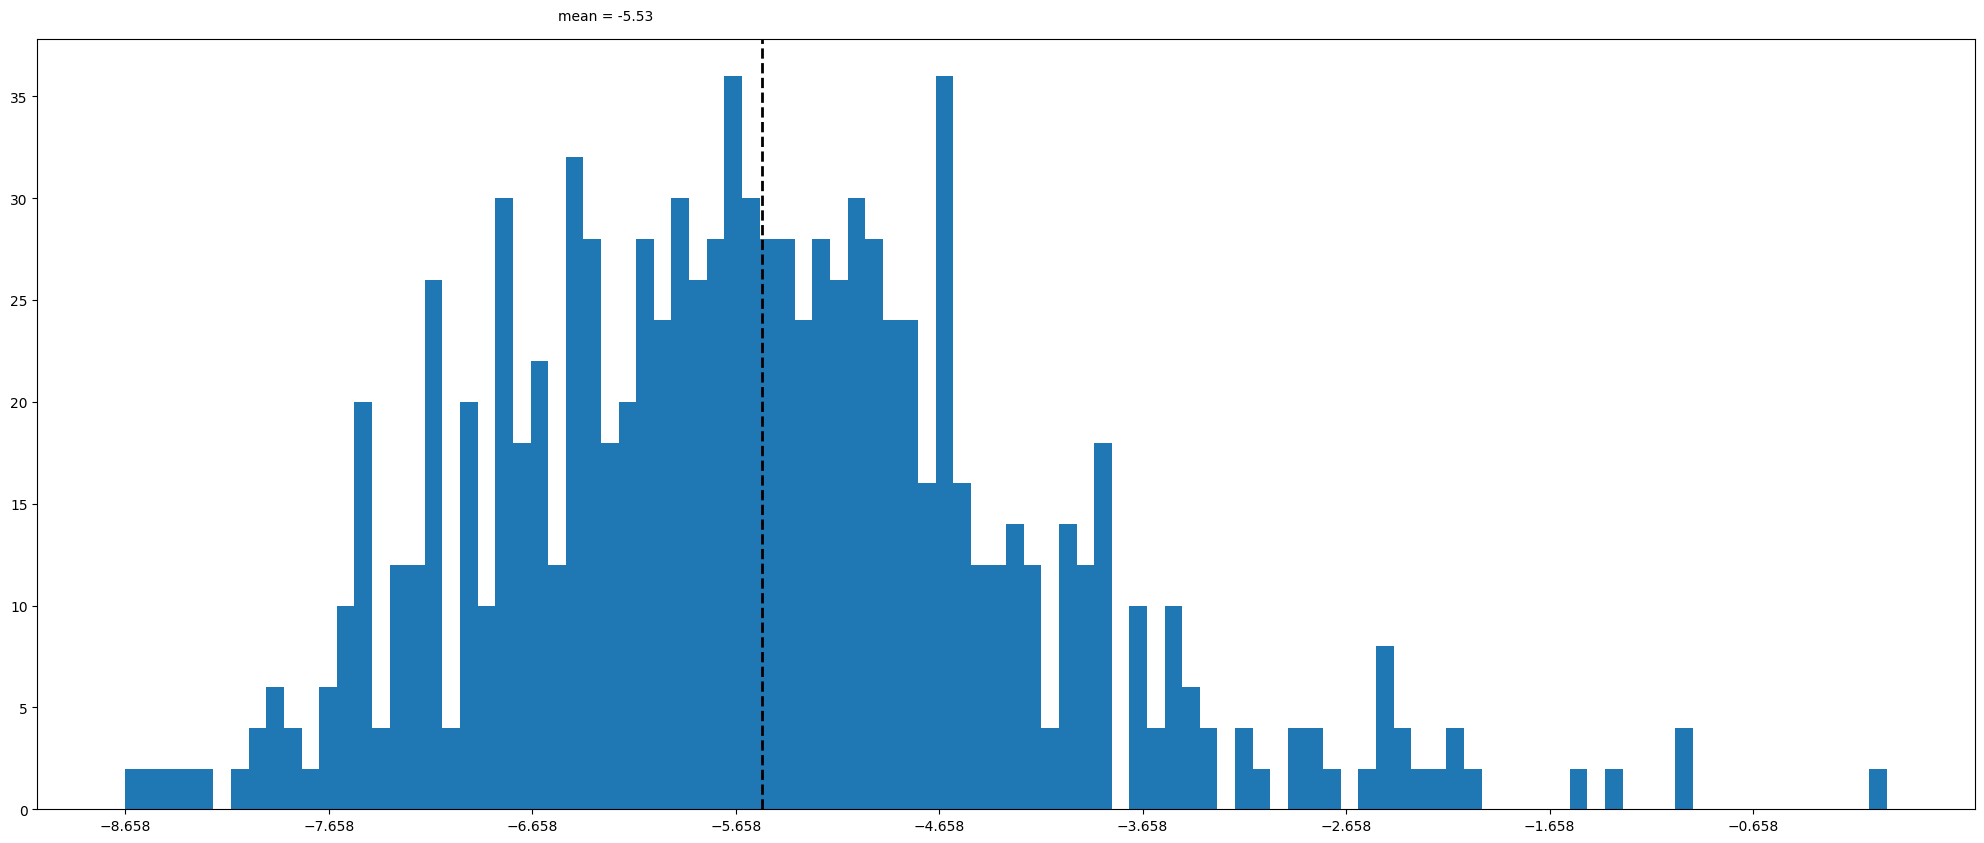

In [6]:
max_val=max(costs)

pl.figure(figsize=(25,10))
_=pl.hist(np.sort(costs), bins=100)
min_ylim, max_ylim = pl.ylim()
max_ylim *=1.025
mean=np.mean(costs)
pl.axvline(mean, color='k', linestyle='dashed', linewidth=2)
_=pl.text(mean-1, max_ylim, 'mean = {:.2f}'.format(mean))
_=pl.xticks(np.arange(mincost, max_val, step=1))

In [7]:
qasm_sim = Aer.get_backend('qasm_simulator')

In [8]:
qaoamc.sample_cost_landscape(qasm_sim, 1024, angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})

Calculating Energy landscape for depth p=1...
Calculating Energy landscape done


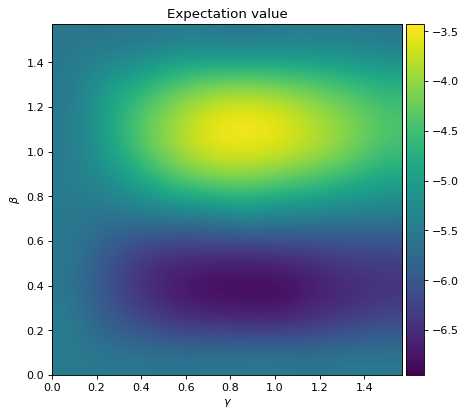

In [9]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

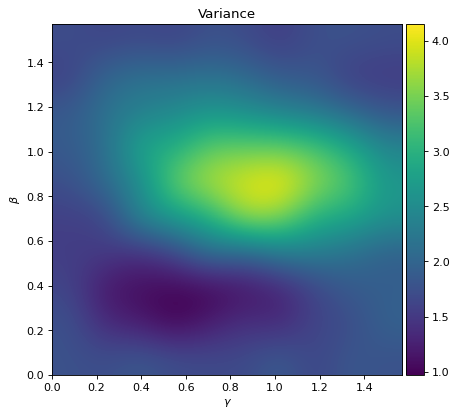

In [10]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Variance')
im = ax.imshow(qaoamc.Var,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

In [11]:
maxdepth=20
for i in range(maxdepth):
    qaoamc.increase_depth(qasm_sim, 1024)

cost(depth= 1 )= -6.897999286382938
cost(depth= 2 )= -7.242619292908325
cost(depth= 3 )= -7.727996204933816
cost(depth= 4 )= -7.947744527821504
cost(depth= 5 )= -8.025285244265609
cost(depth= 6 )= -8.163677514375243
cost(depth= 7 )= -8.210030778794042
cost(depth= 8 )= -8.28583985110166
cost(depth= 9 )= -8.312553780575684
cost(depth= 10 )= -8.36558857660694
cost(depth= 11 )= -8.40147484432527
cost(depth= 12 )= -8.404744836446236
cost(depth= 13 )= -8.40728710197259
cost(depth= 14 )= -8.419949047127098
cost(depth= 15 )= -8.453688152562544
cost(depth= 16 )= -8.446268571067133
cost(depth= 17 )= -8.48678253752365
cost(depth= 18 )= -8.467639701541728
cost(depth= 19 )= -8.493669922232028
cost(depth= 20 )= -8.527619788606357


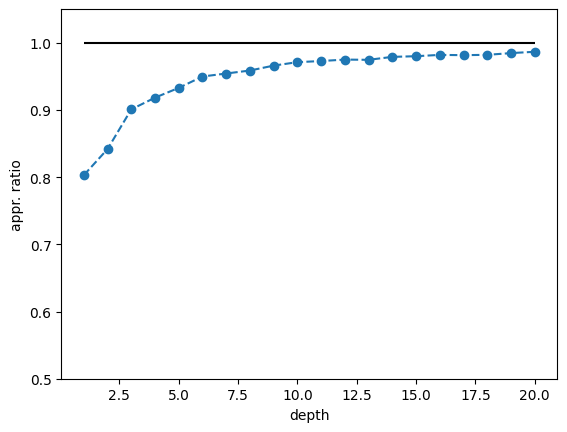

In [12]:
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoamc.costval.values()))/mincost,'o--')
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
pl.ylim(0.5,1.05)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')

144.0

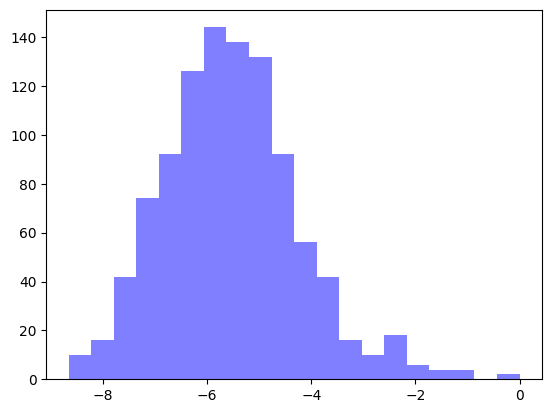

In [19]:
a,b,_=pl.hist(np.sort(costs), bins=20, alpha = 0.5, color= 'b')
max(a)

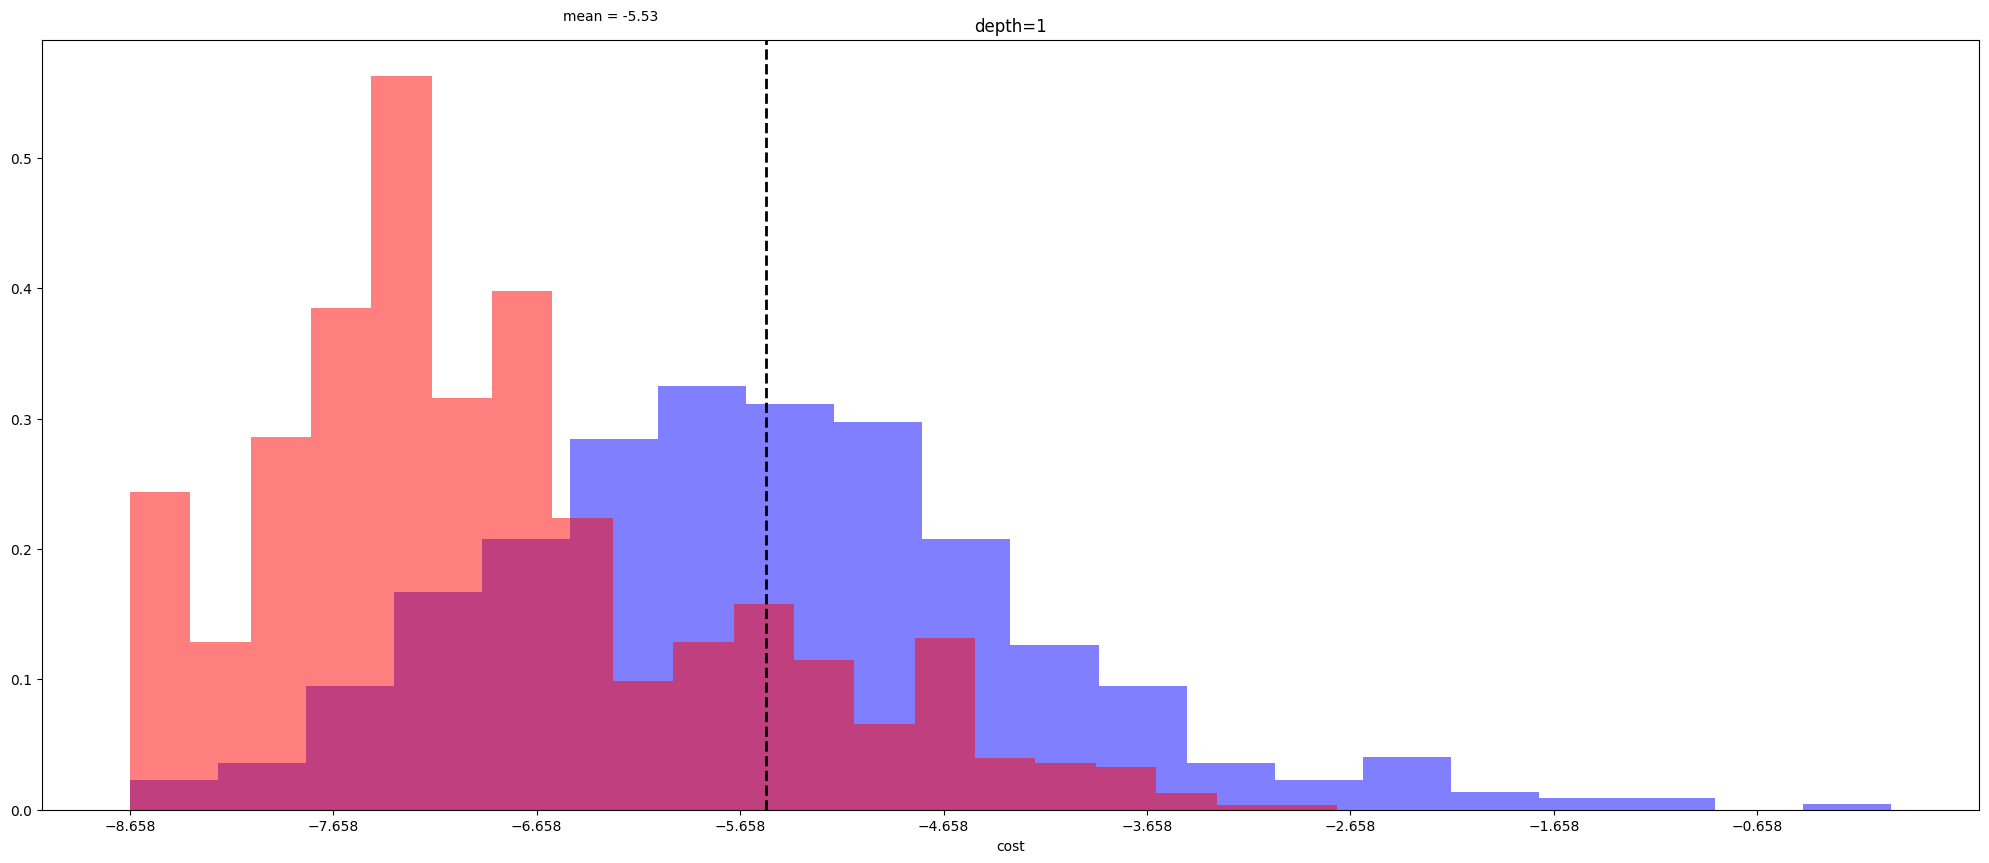

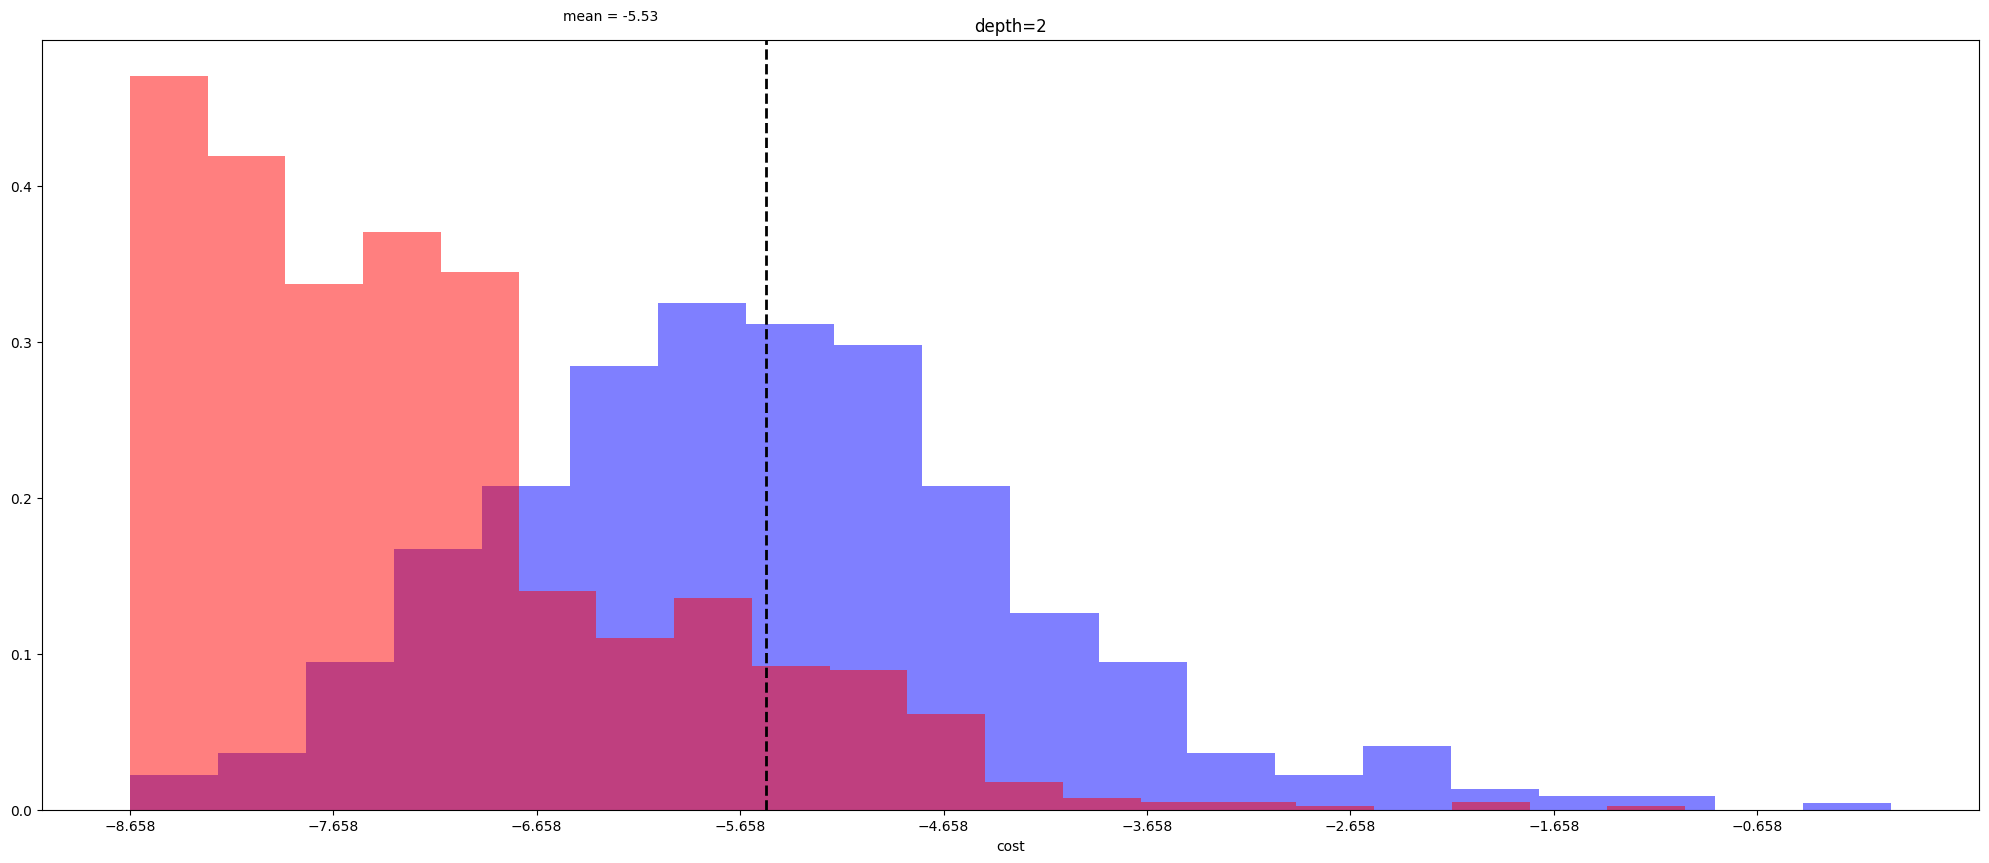

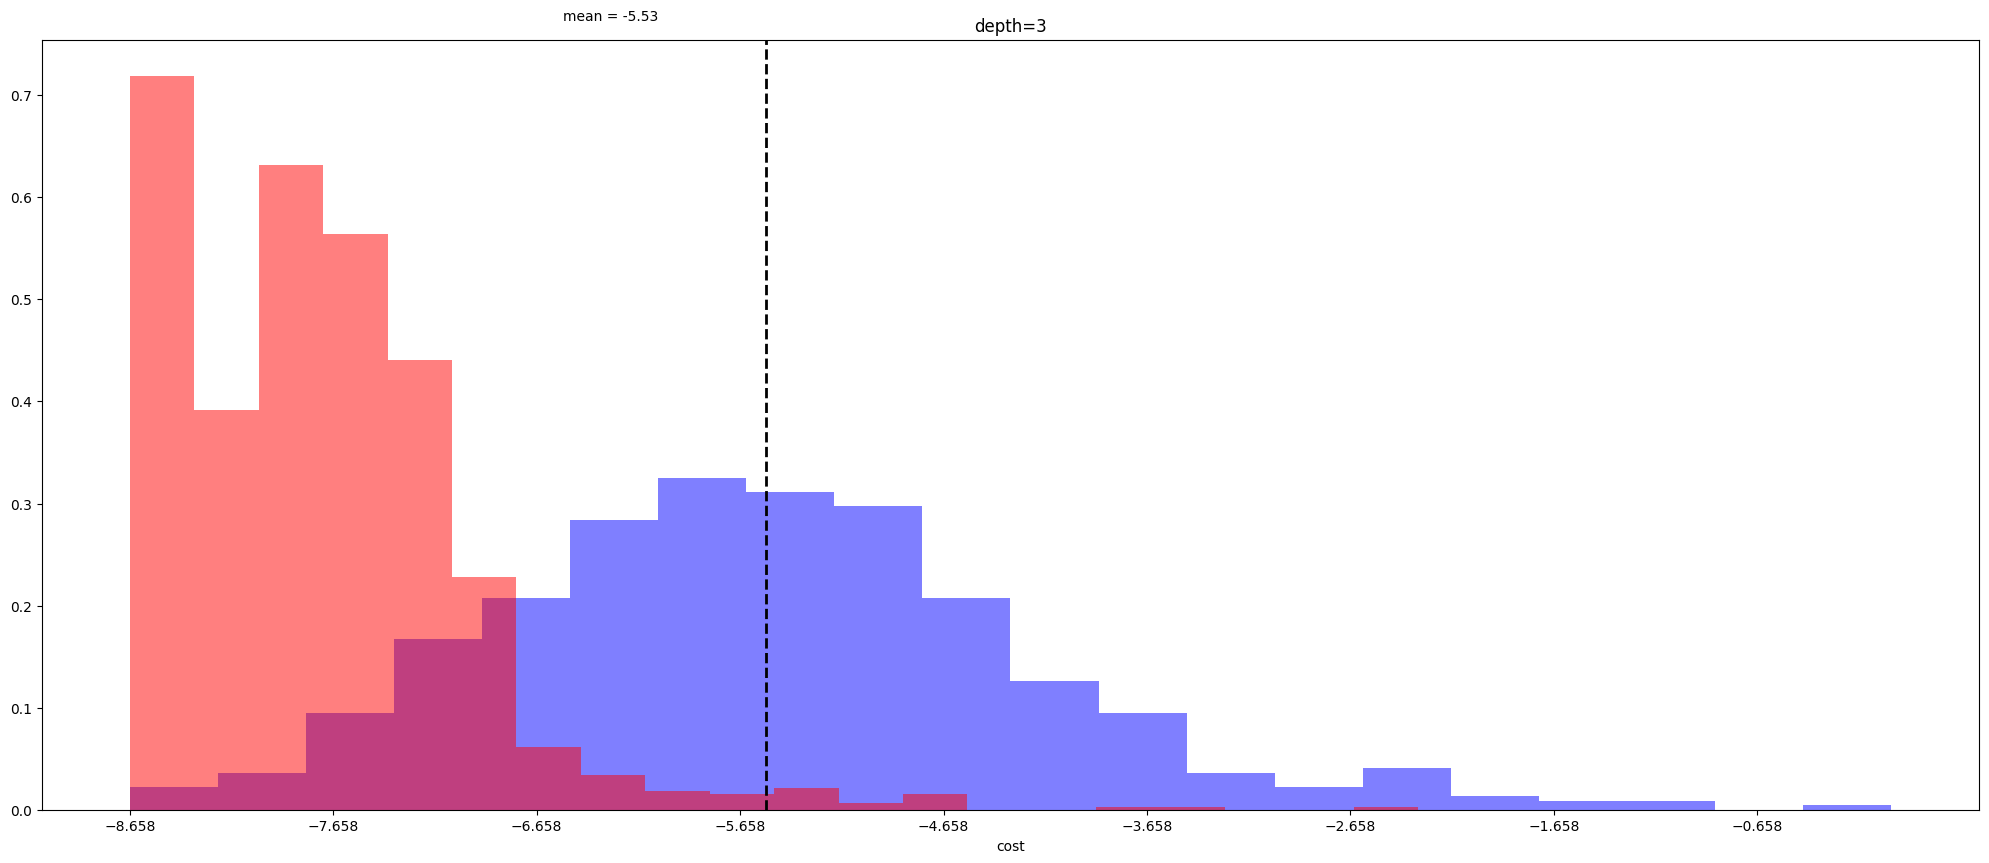

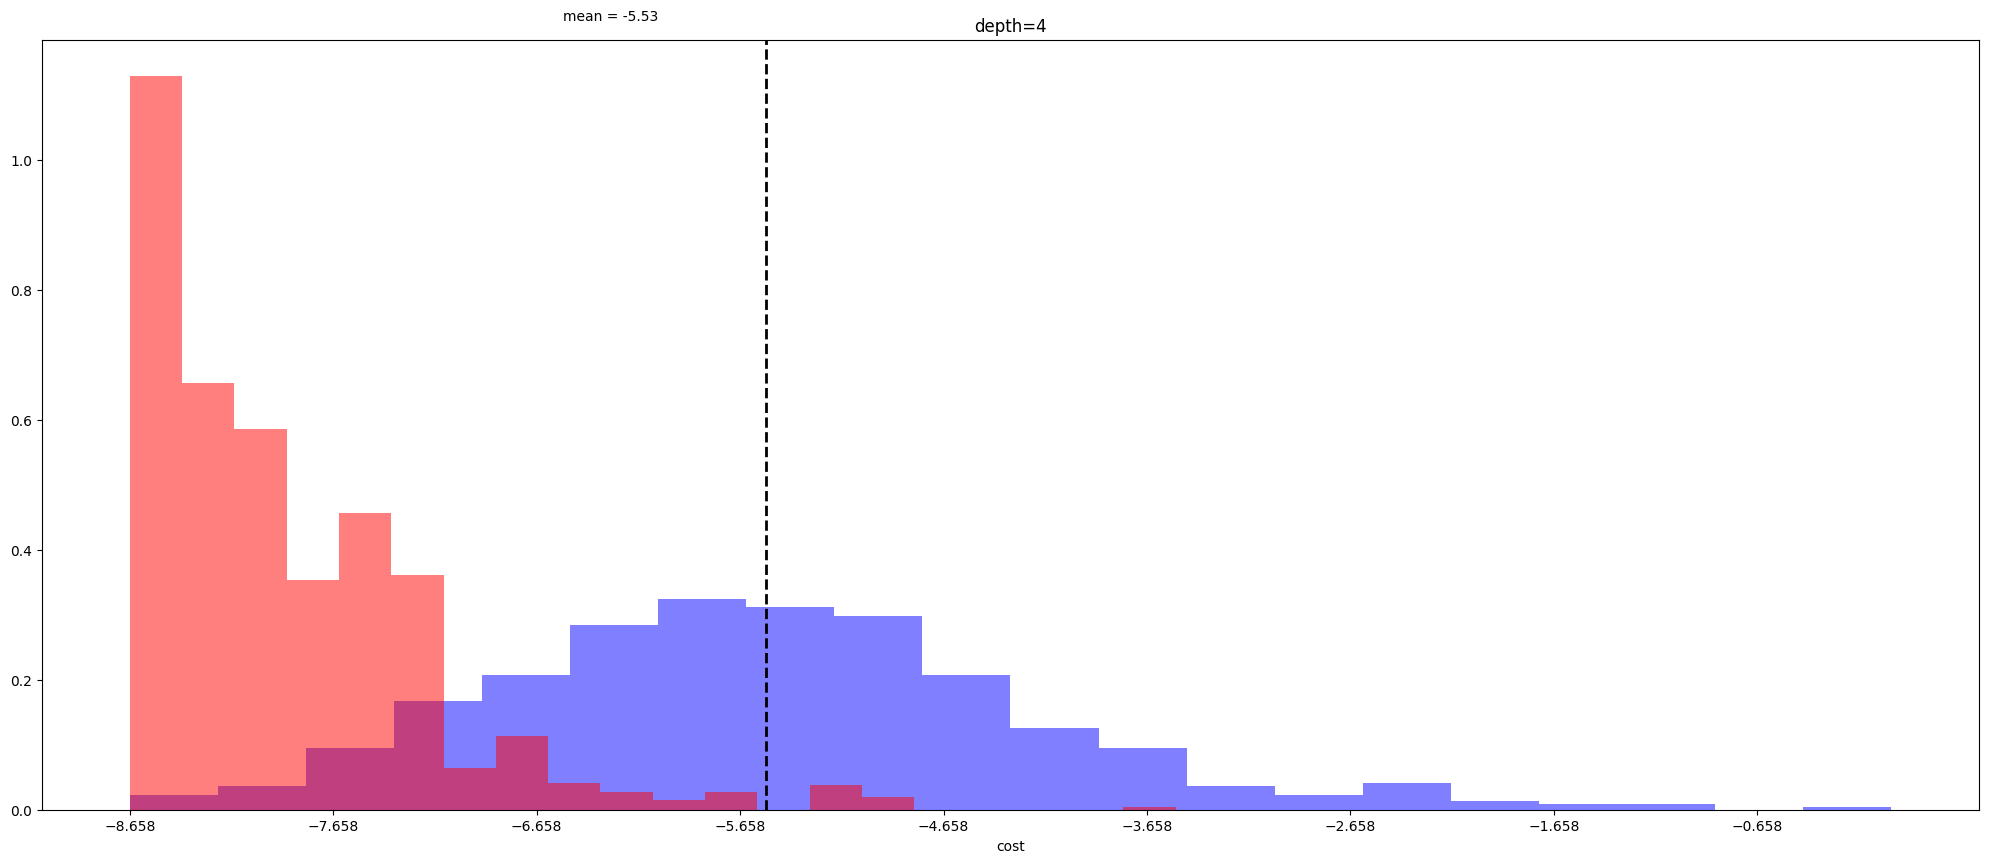

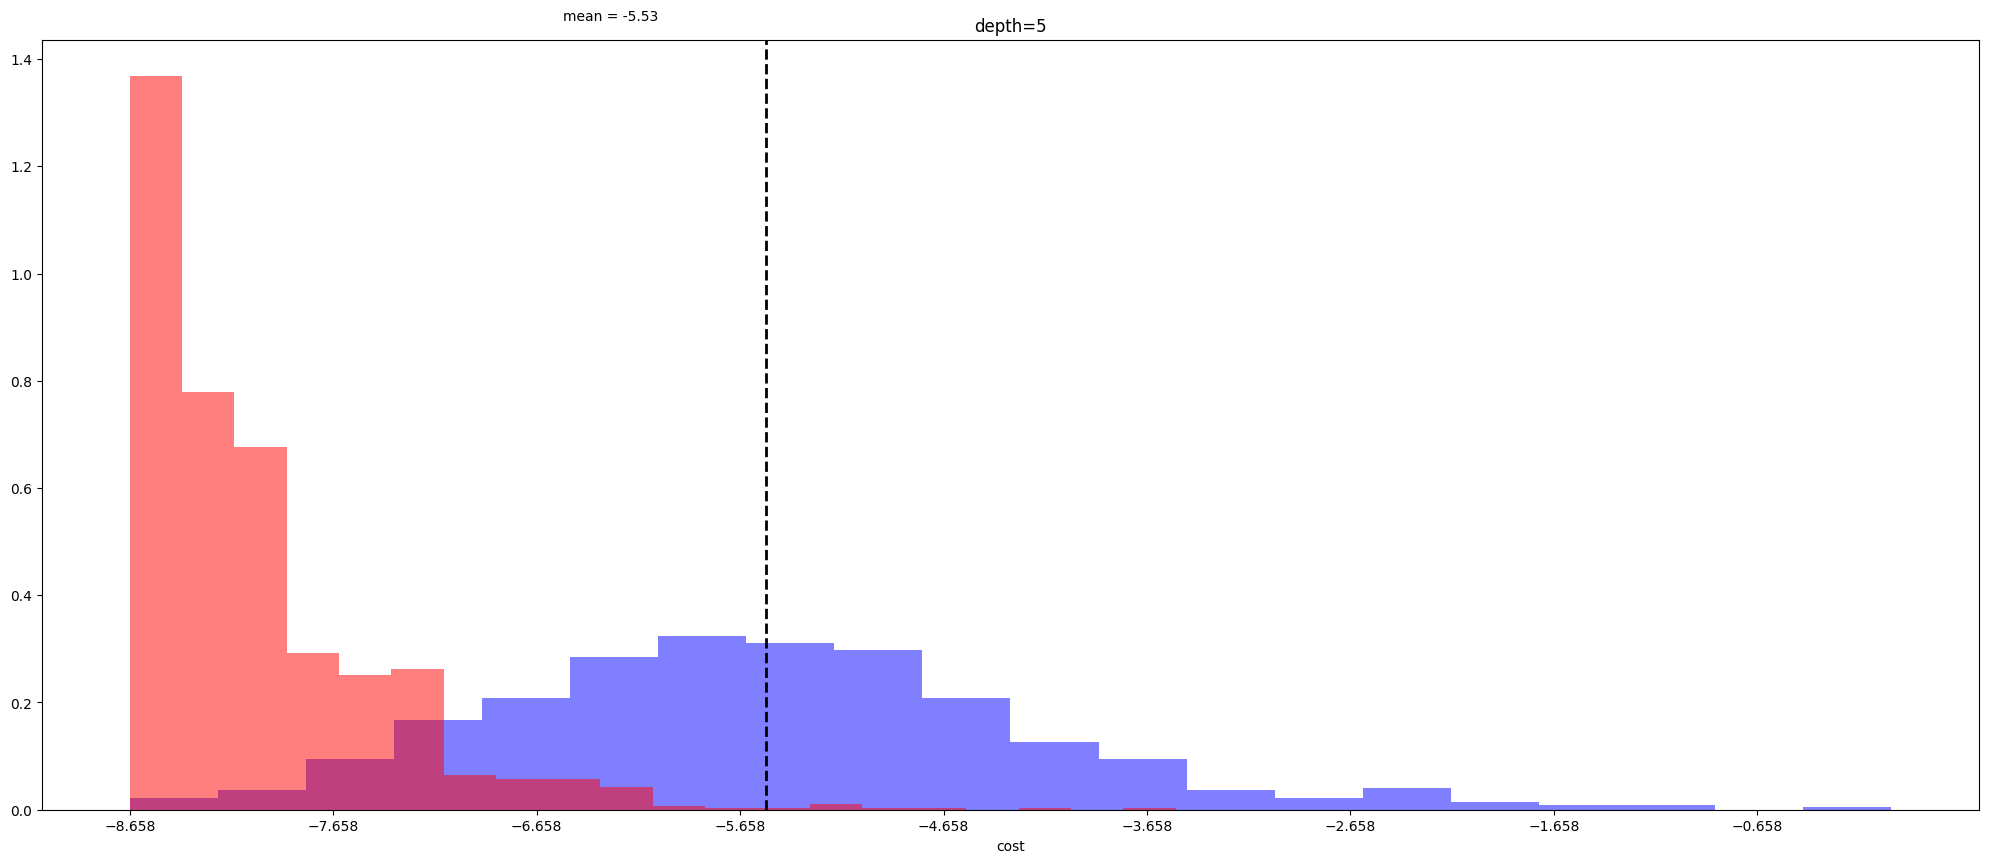

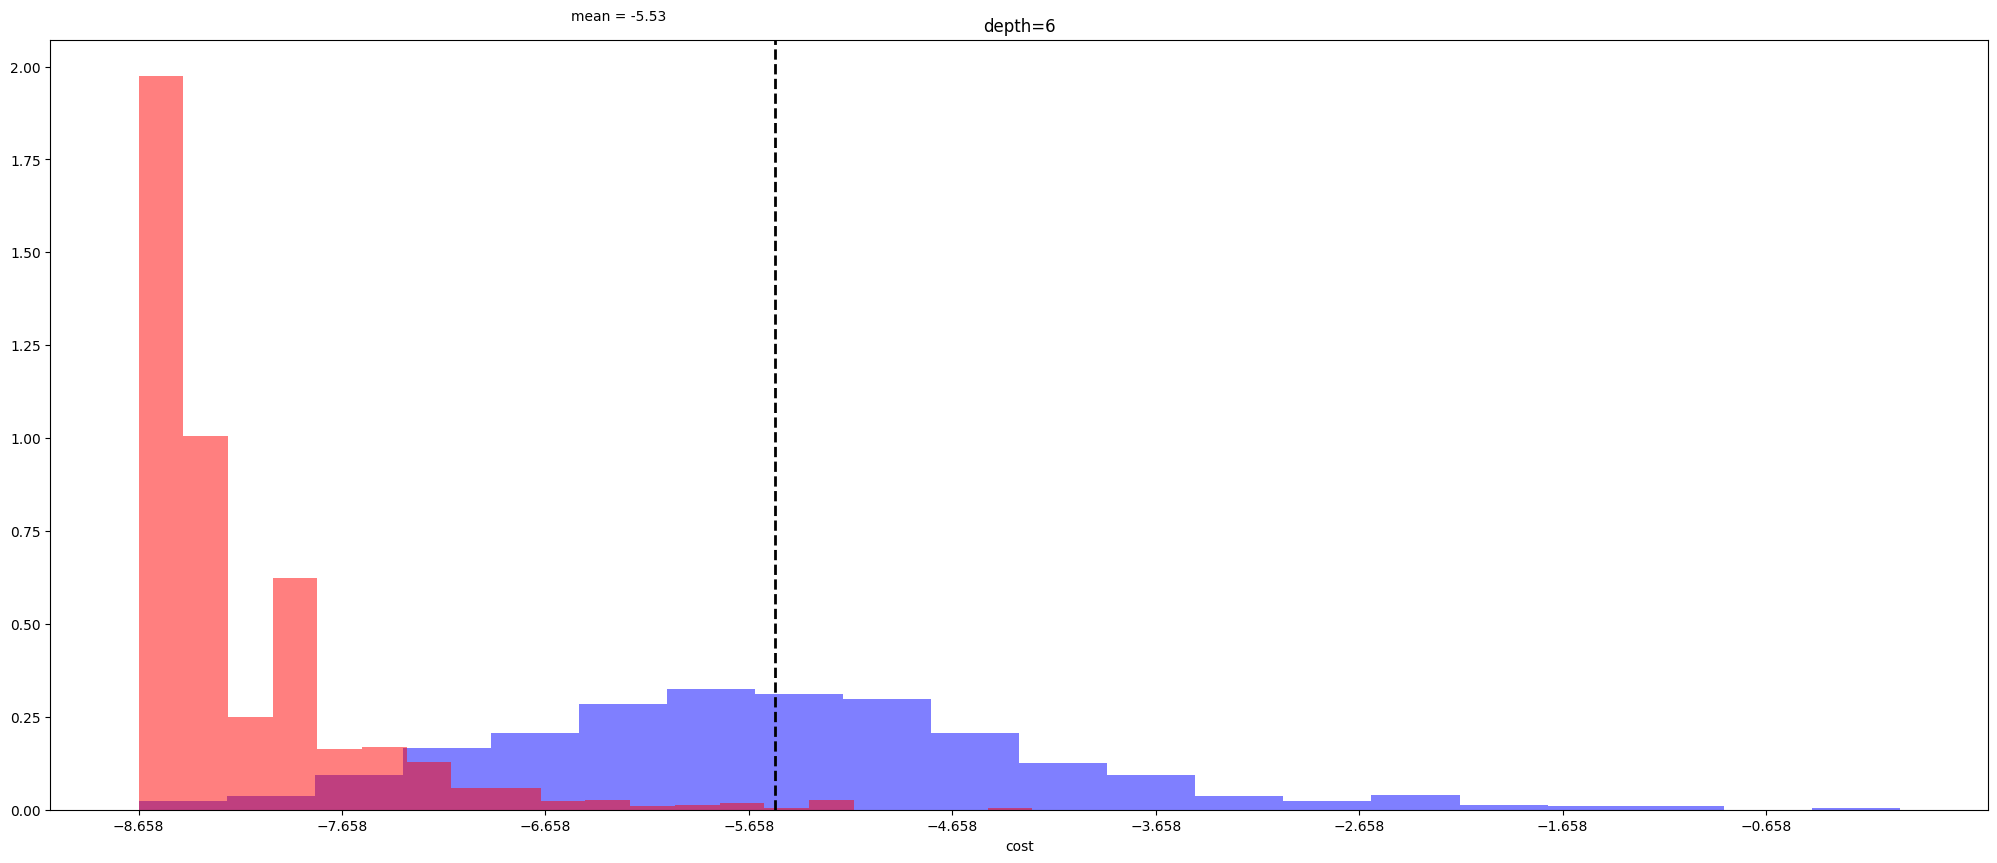

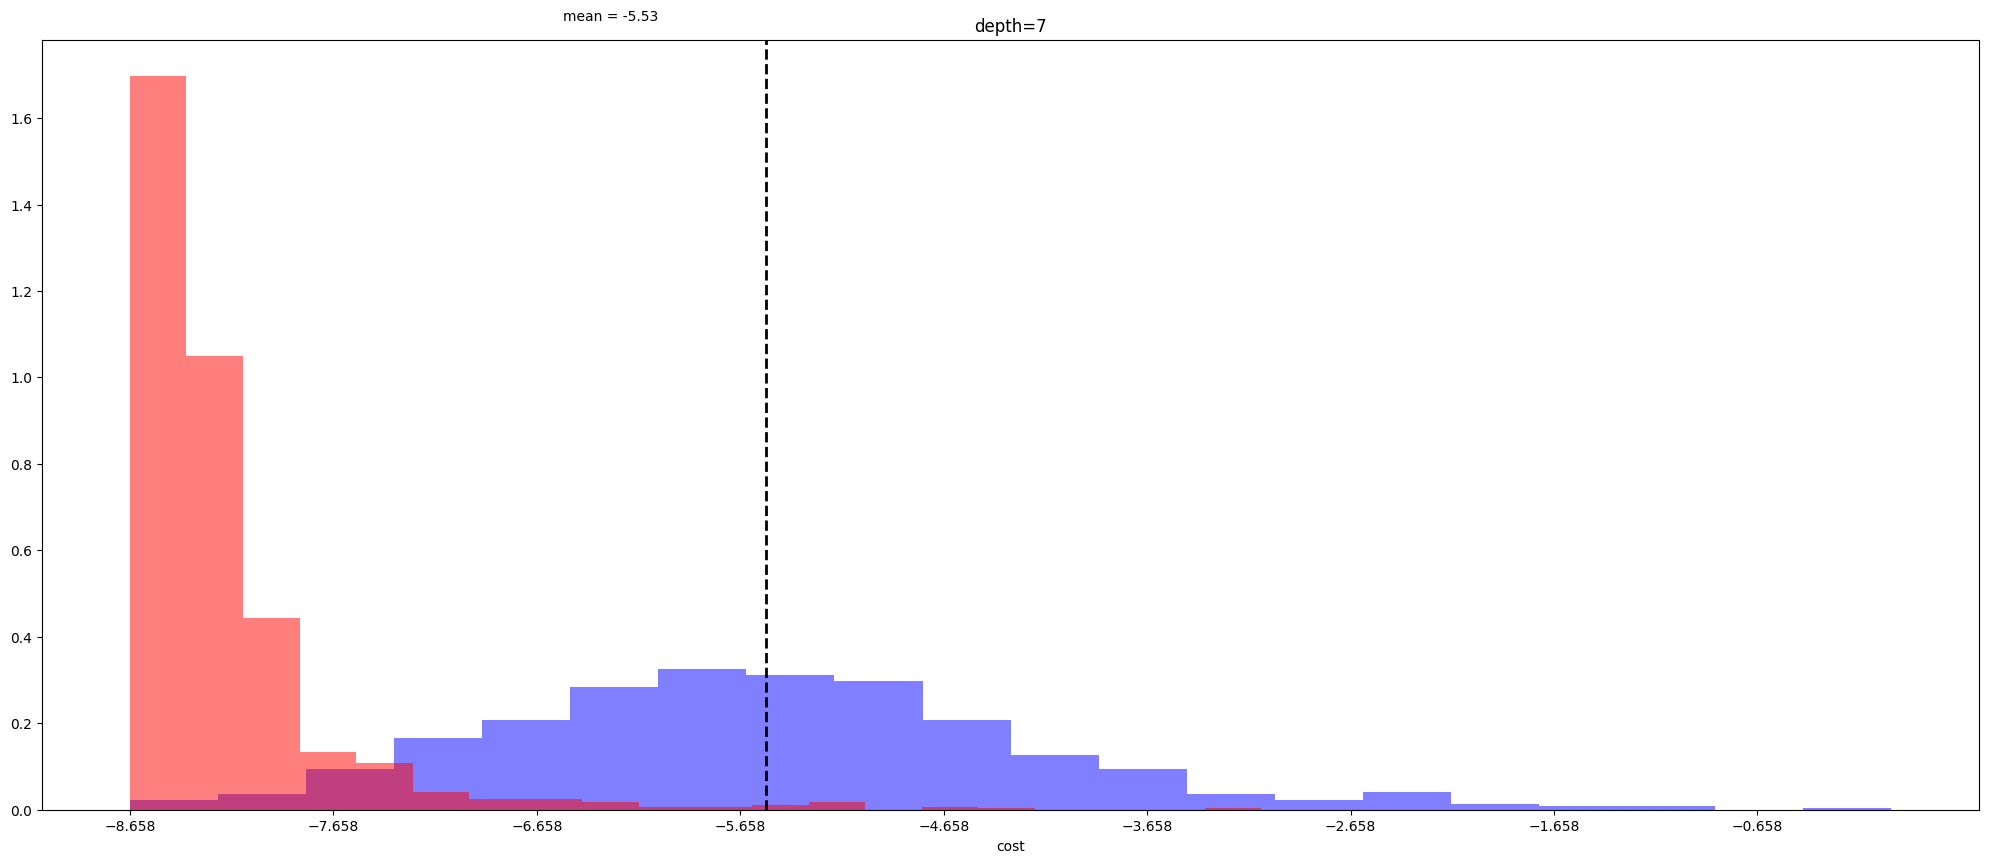

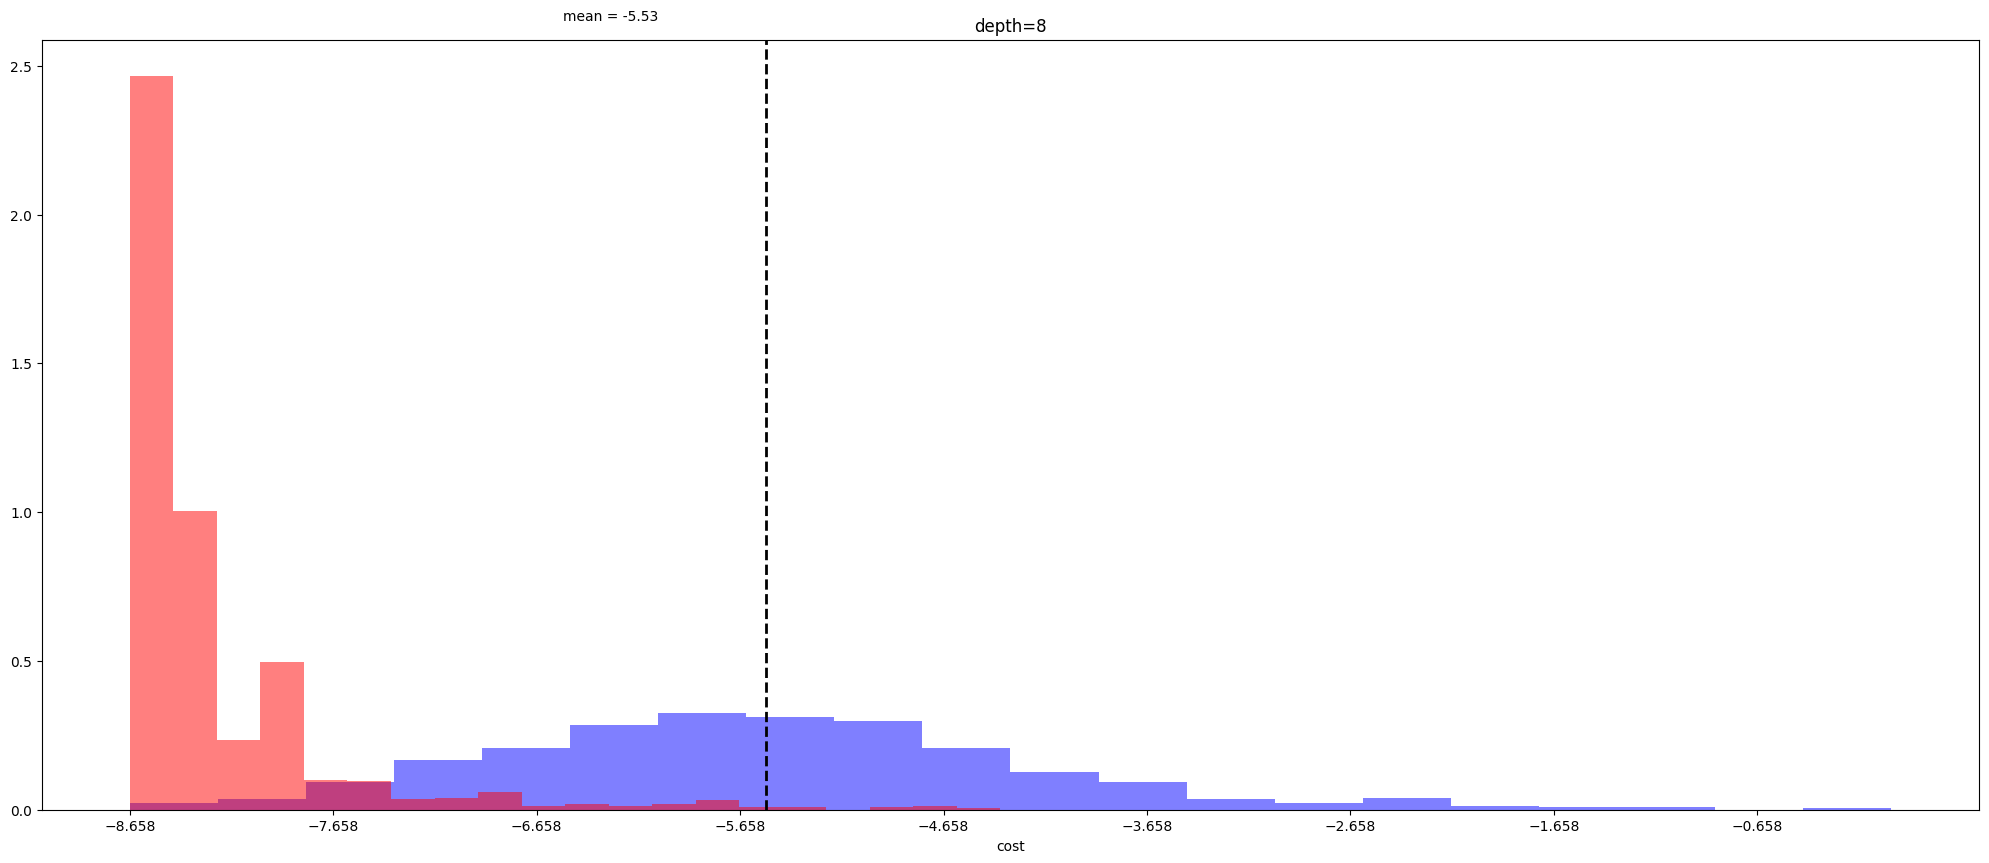

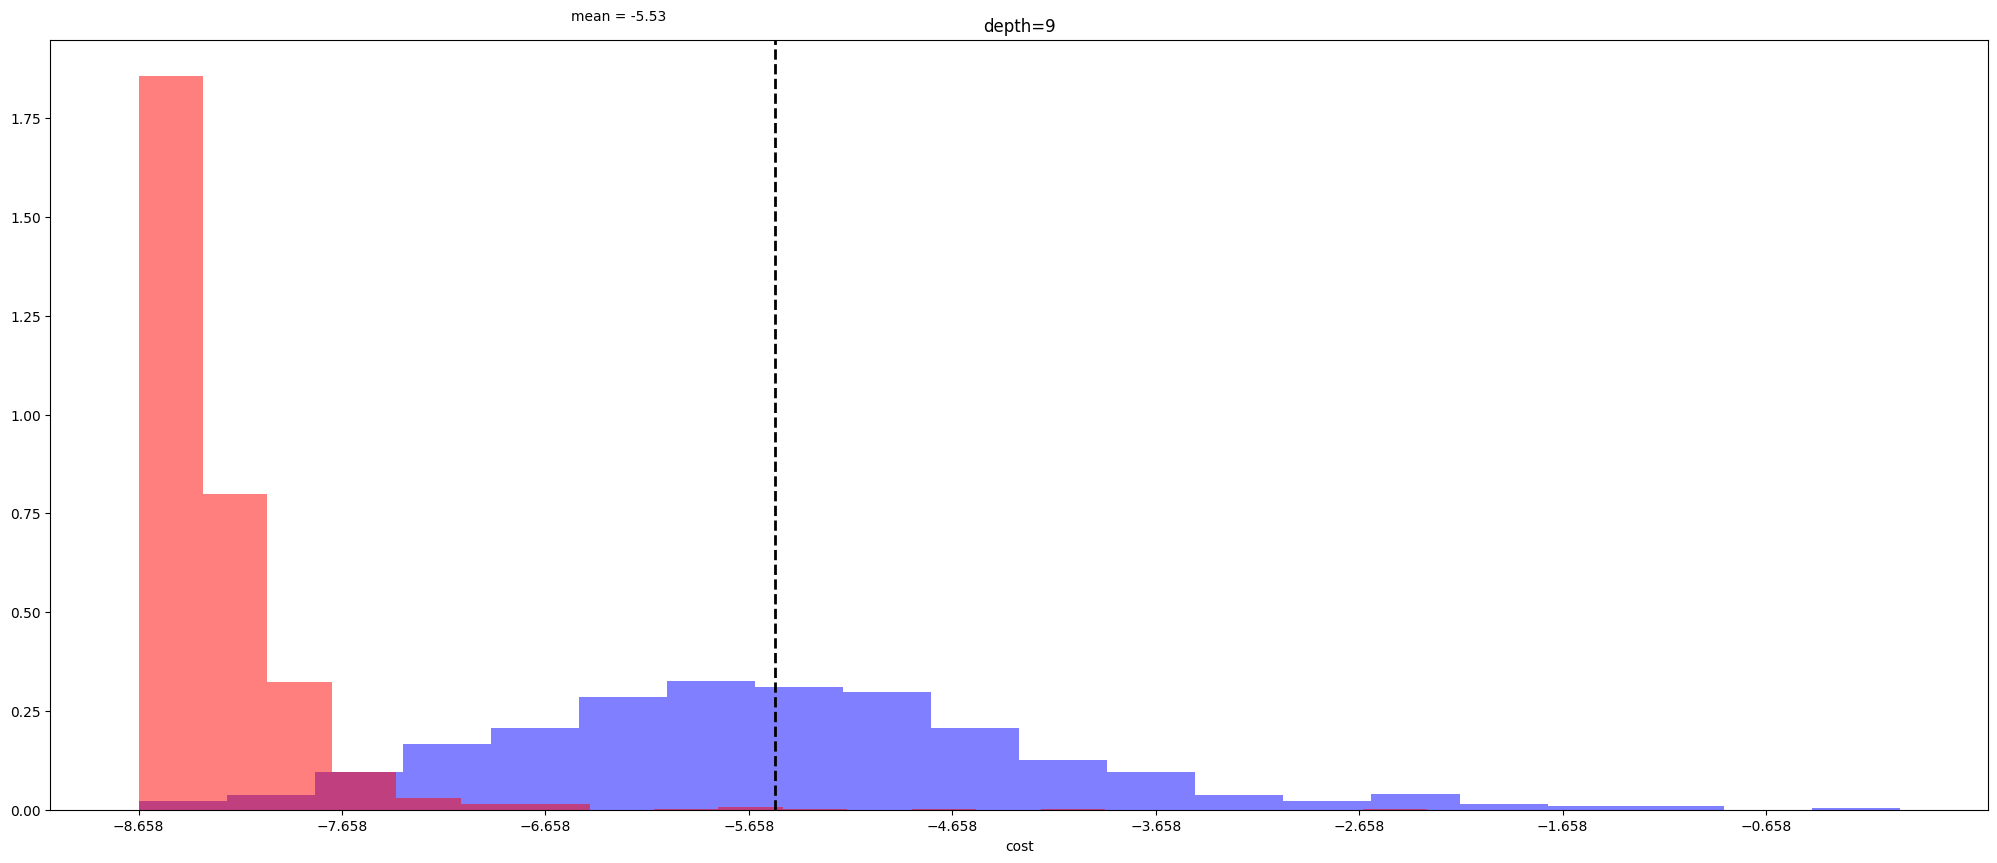

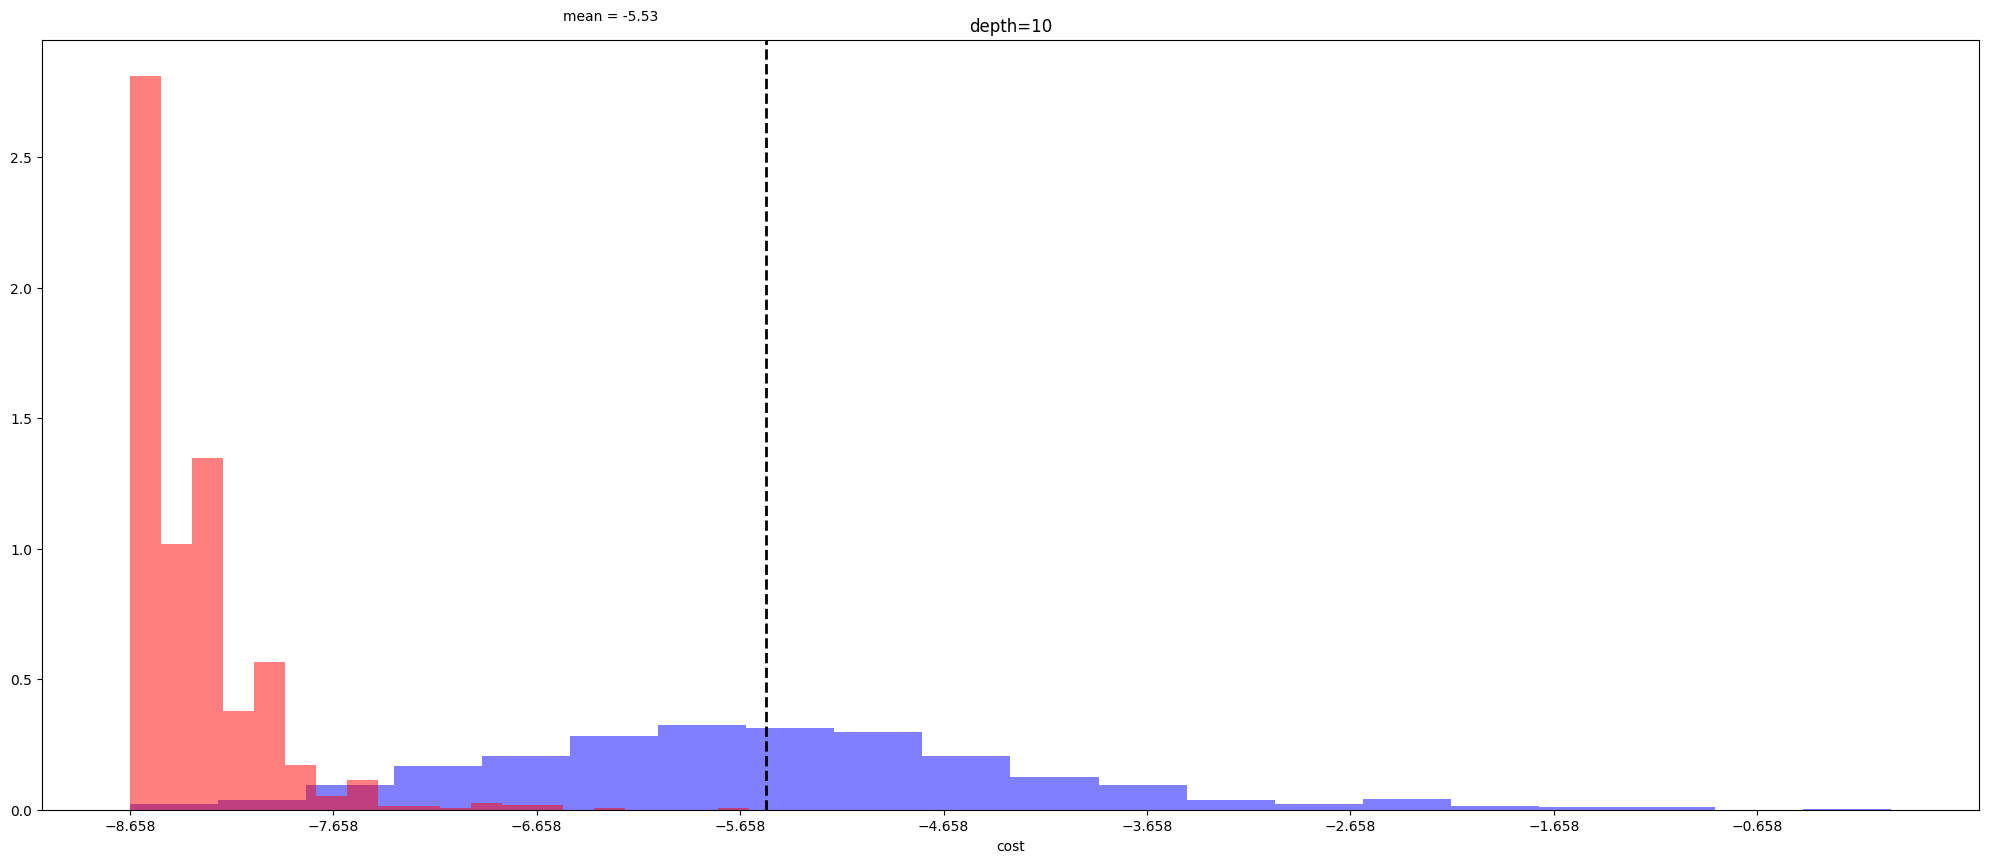

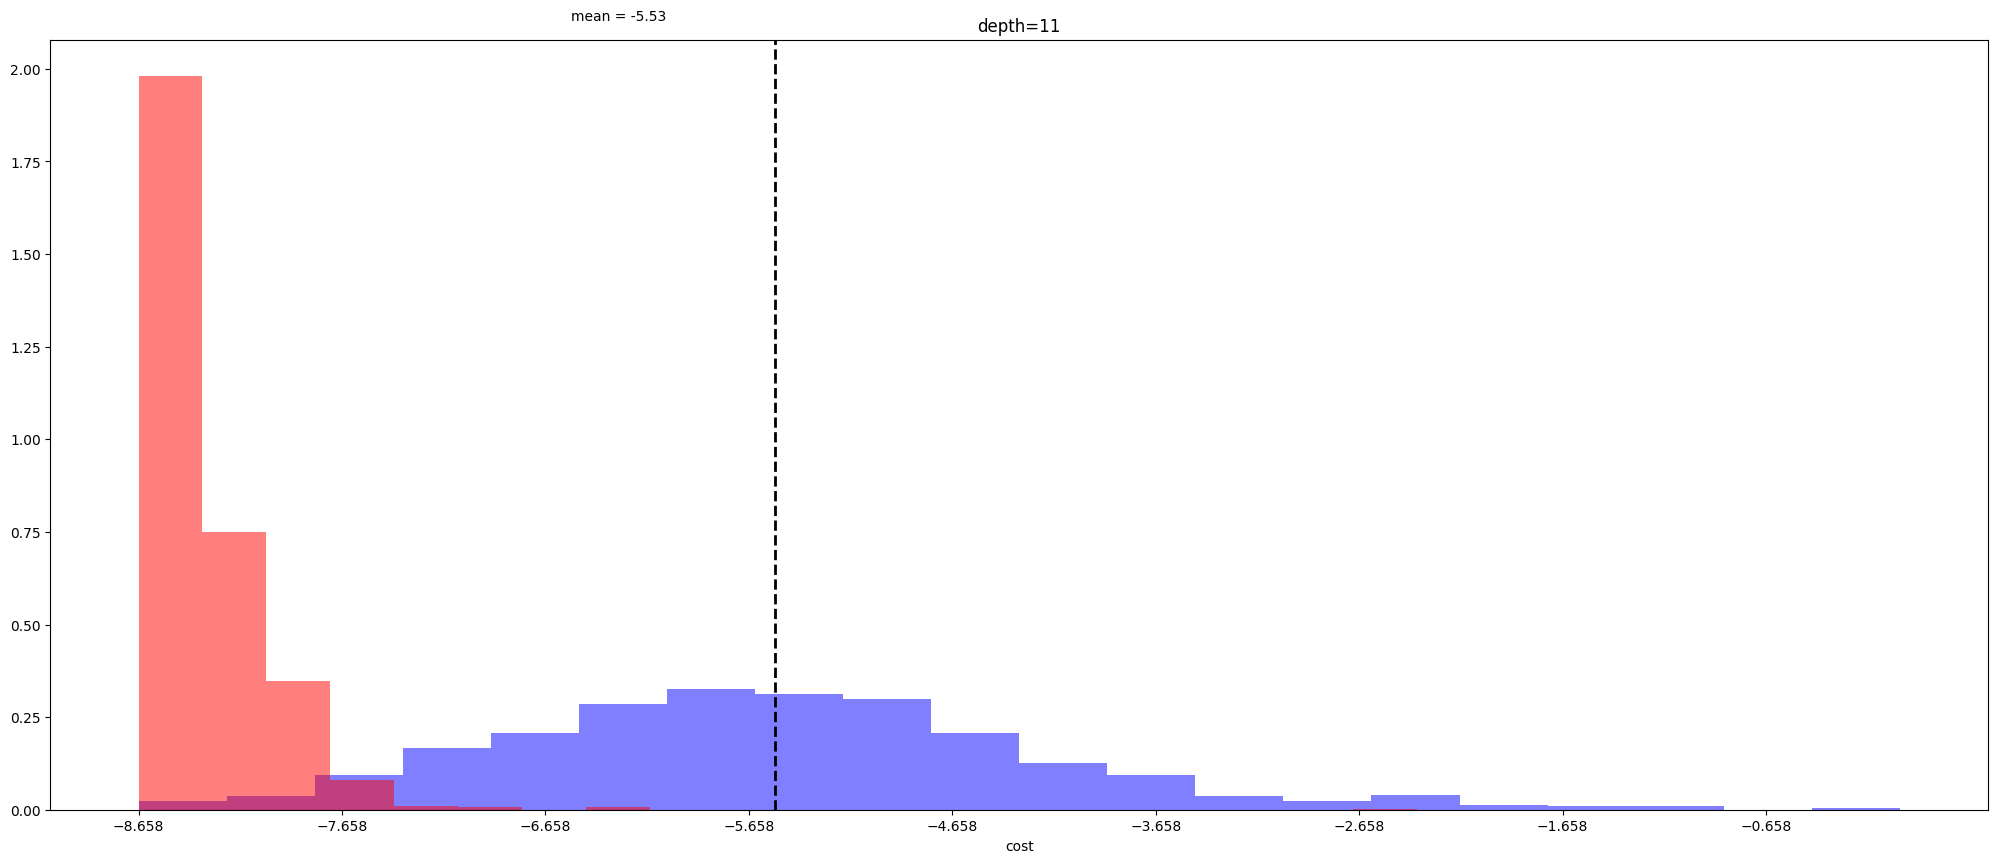

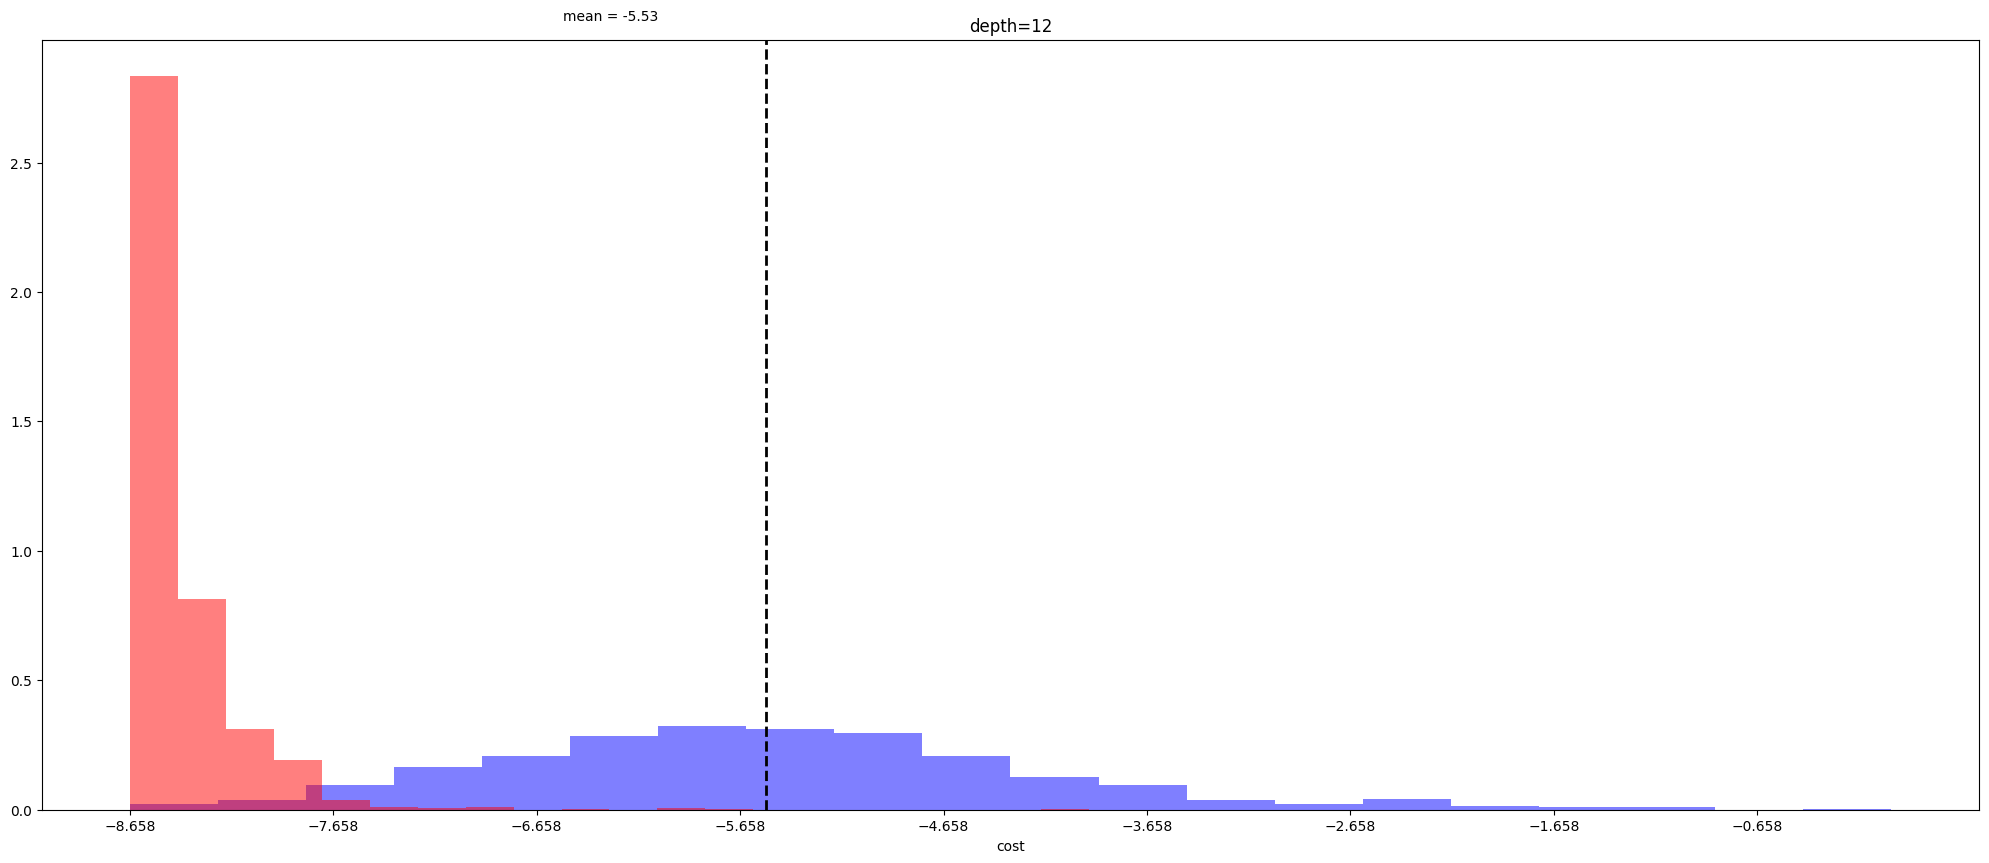

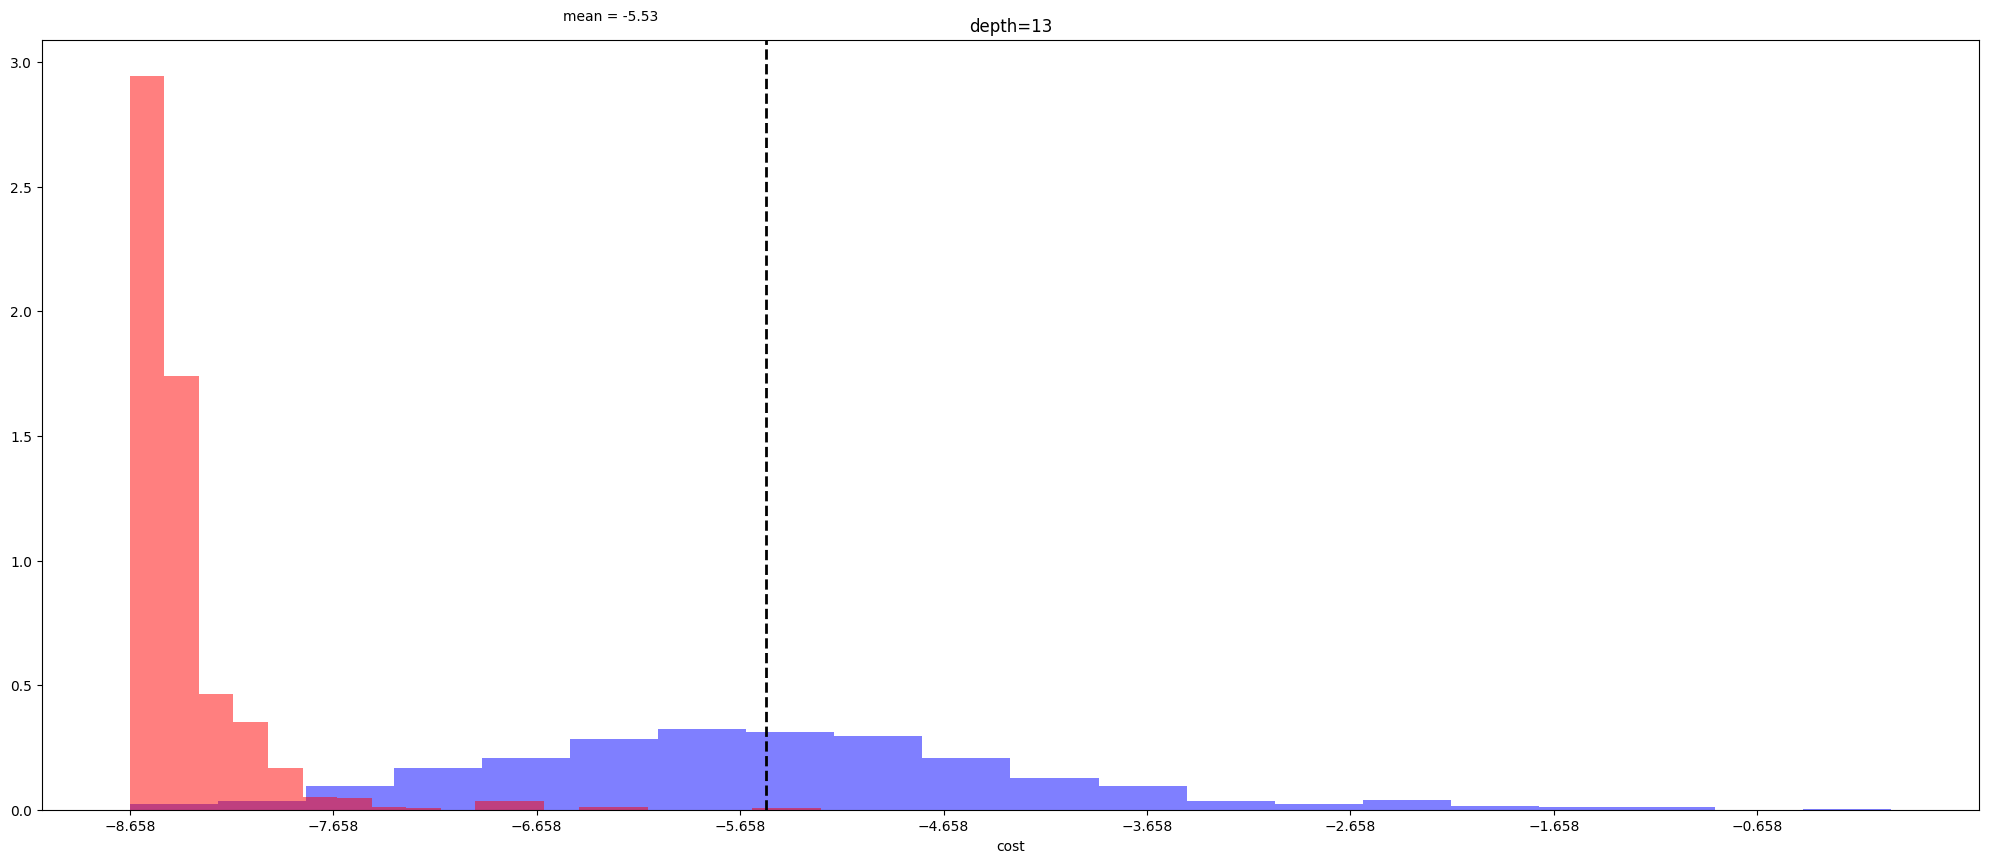

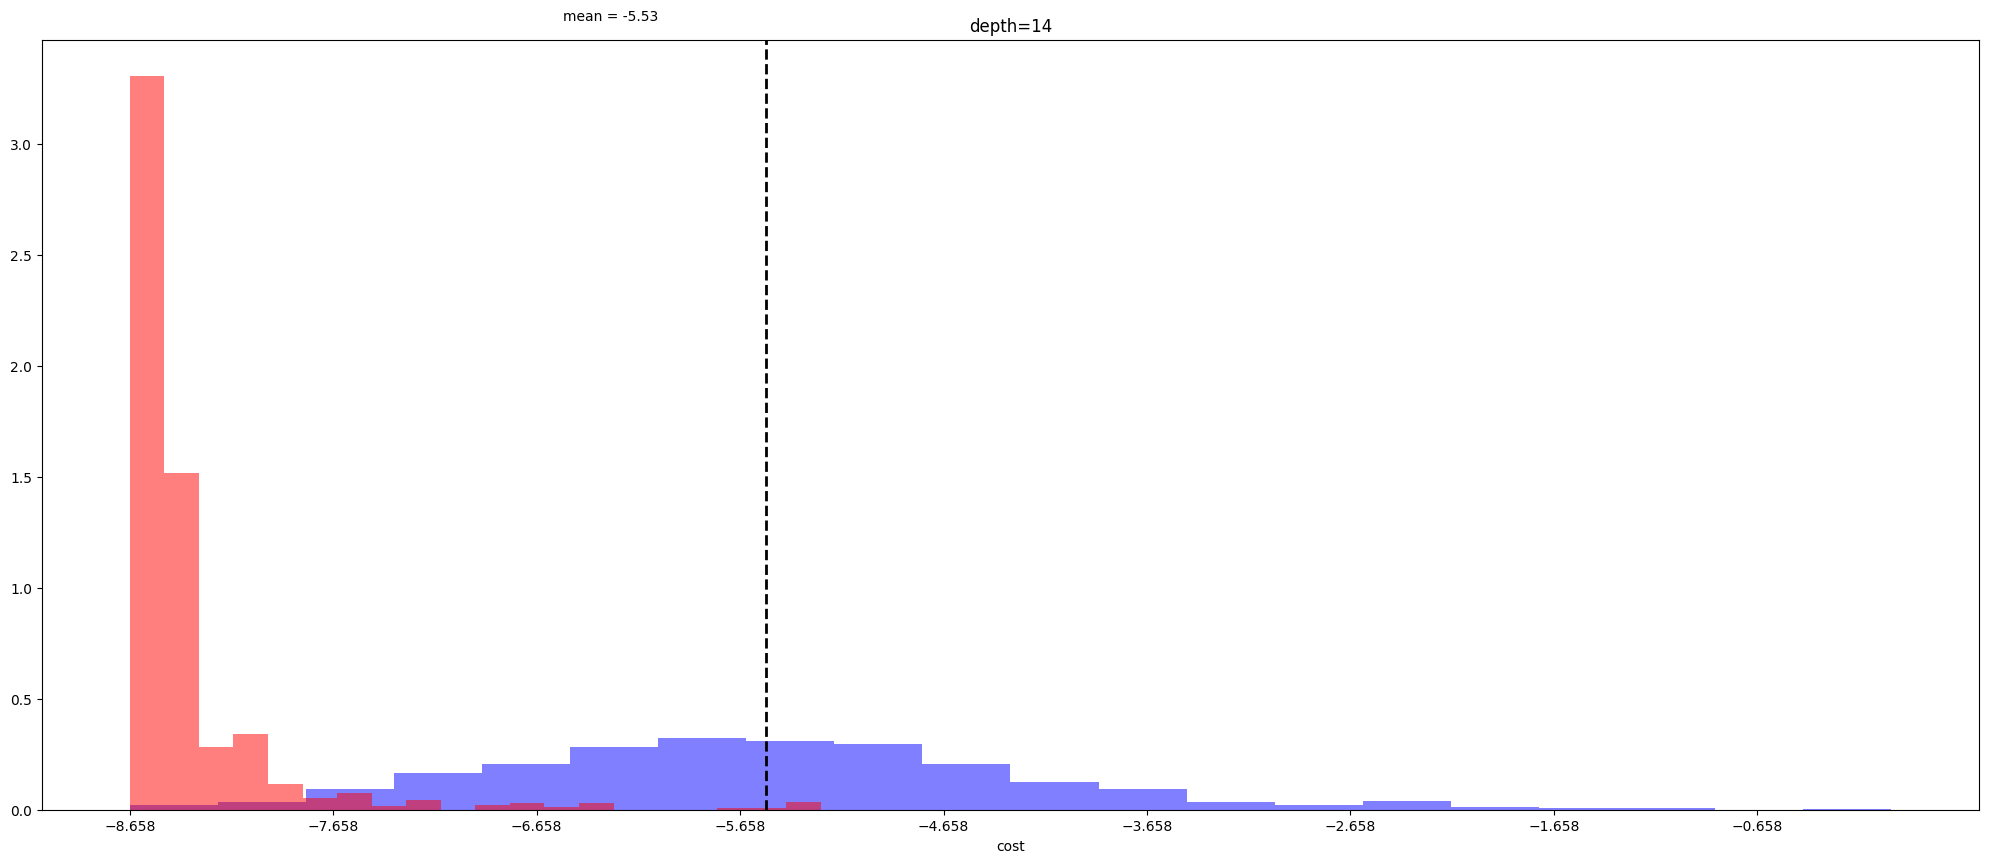

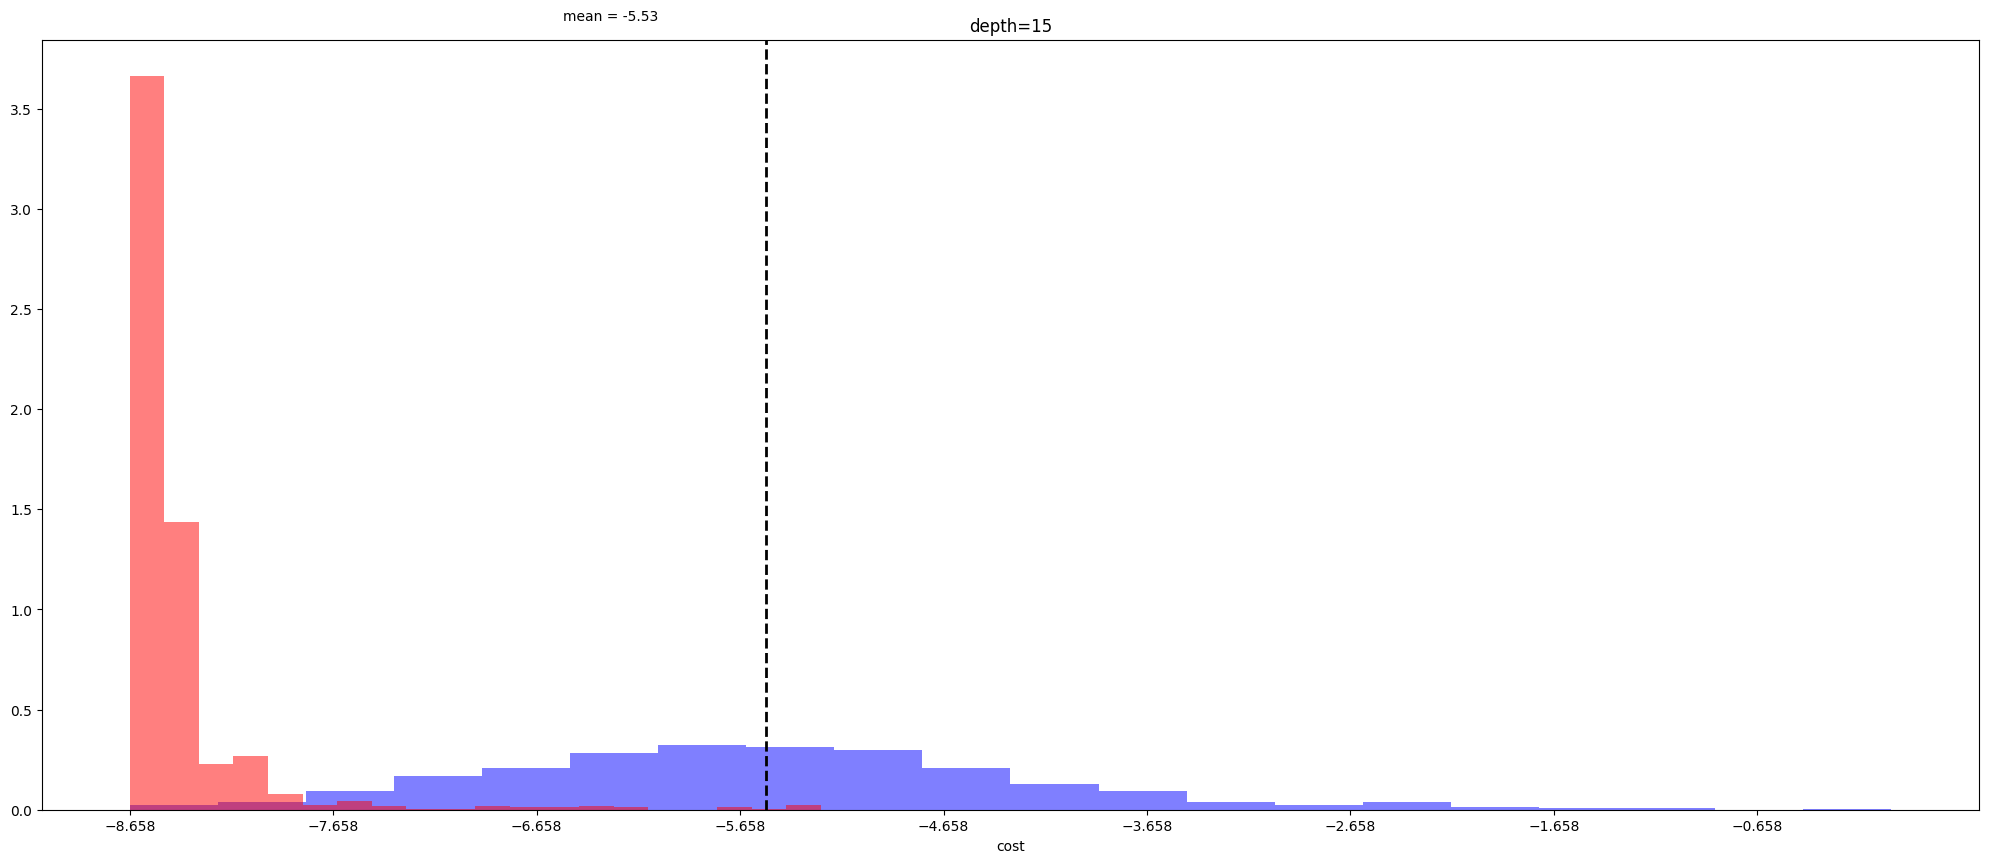

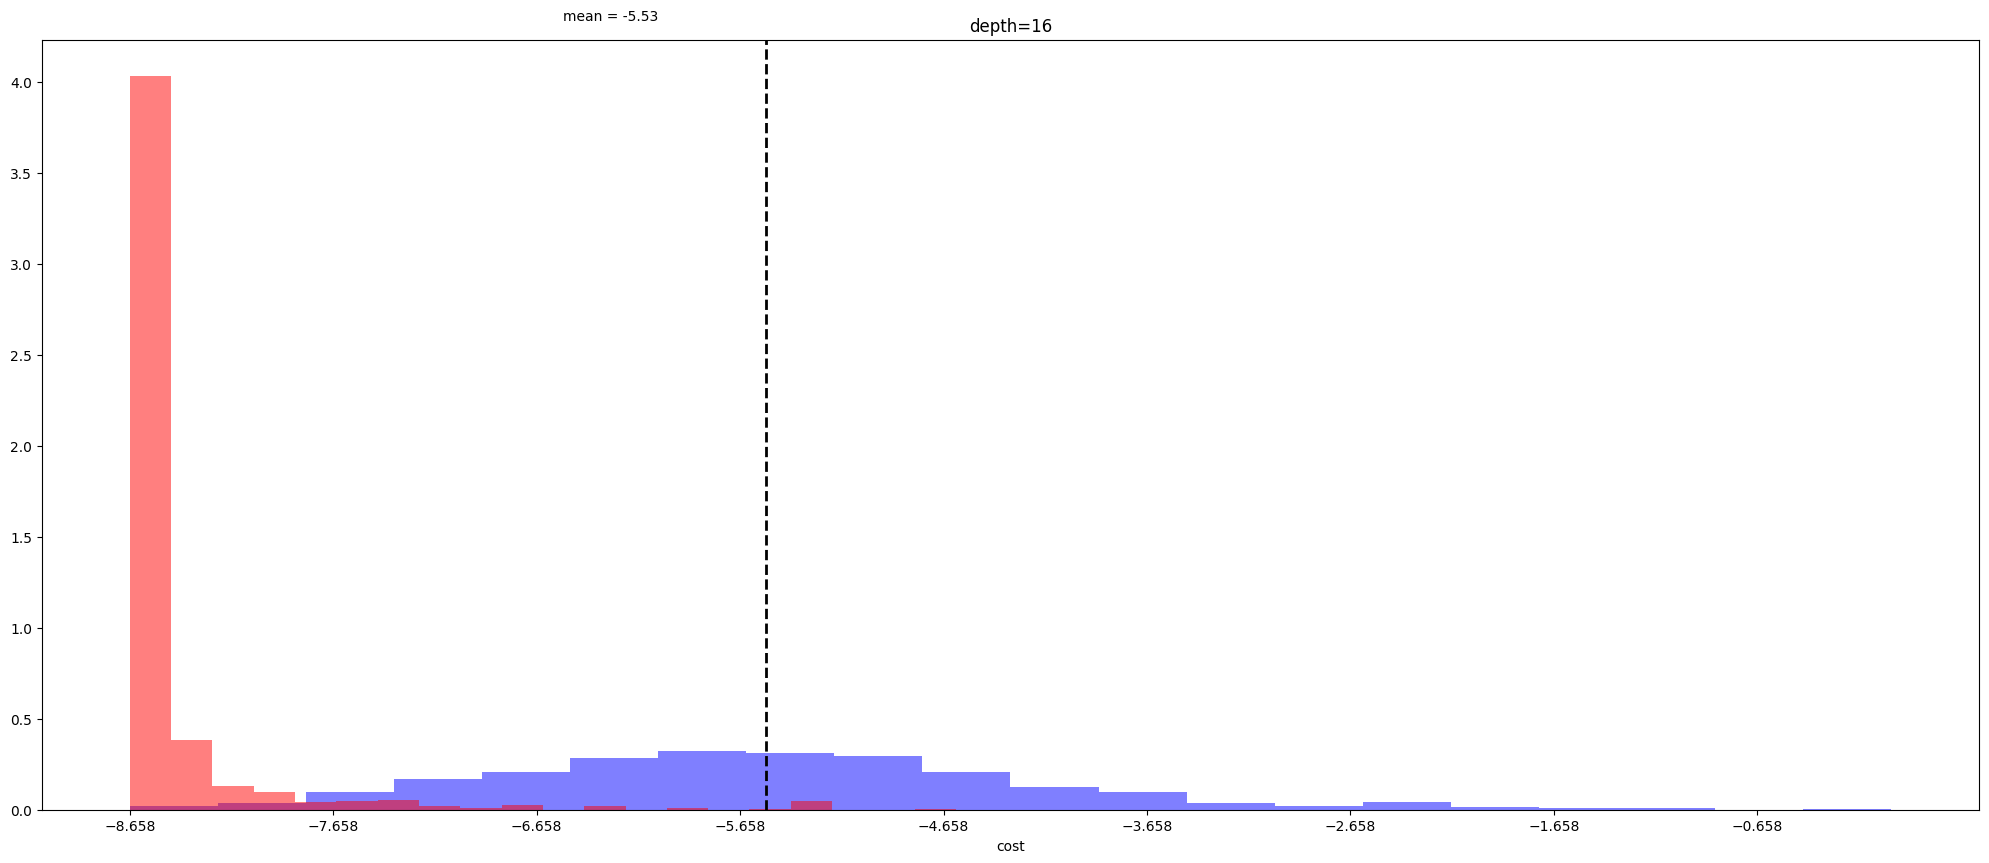

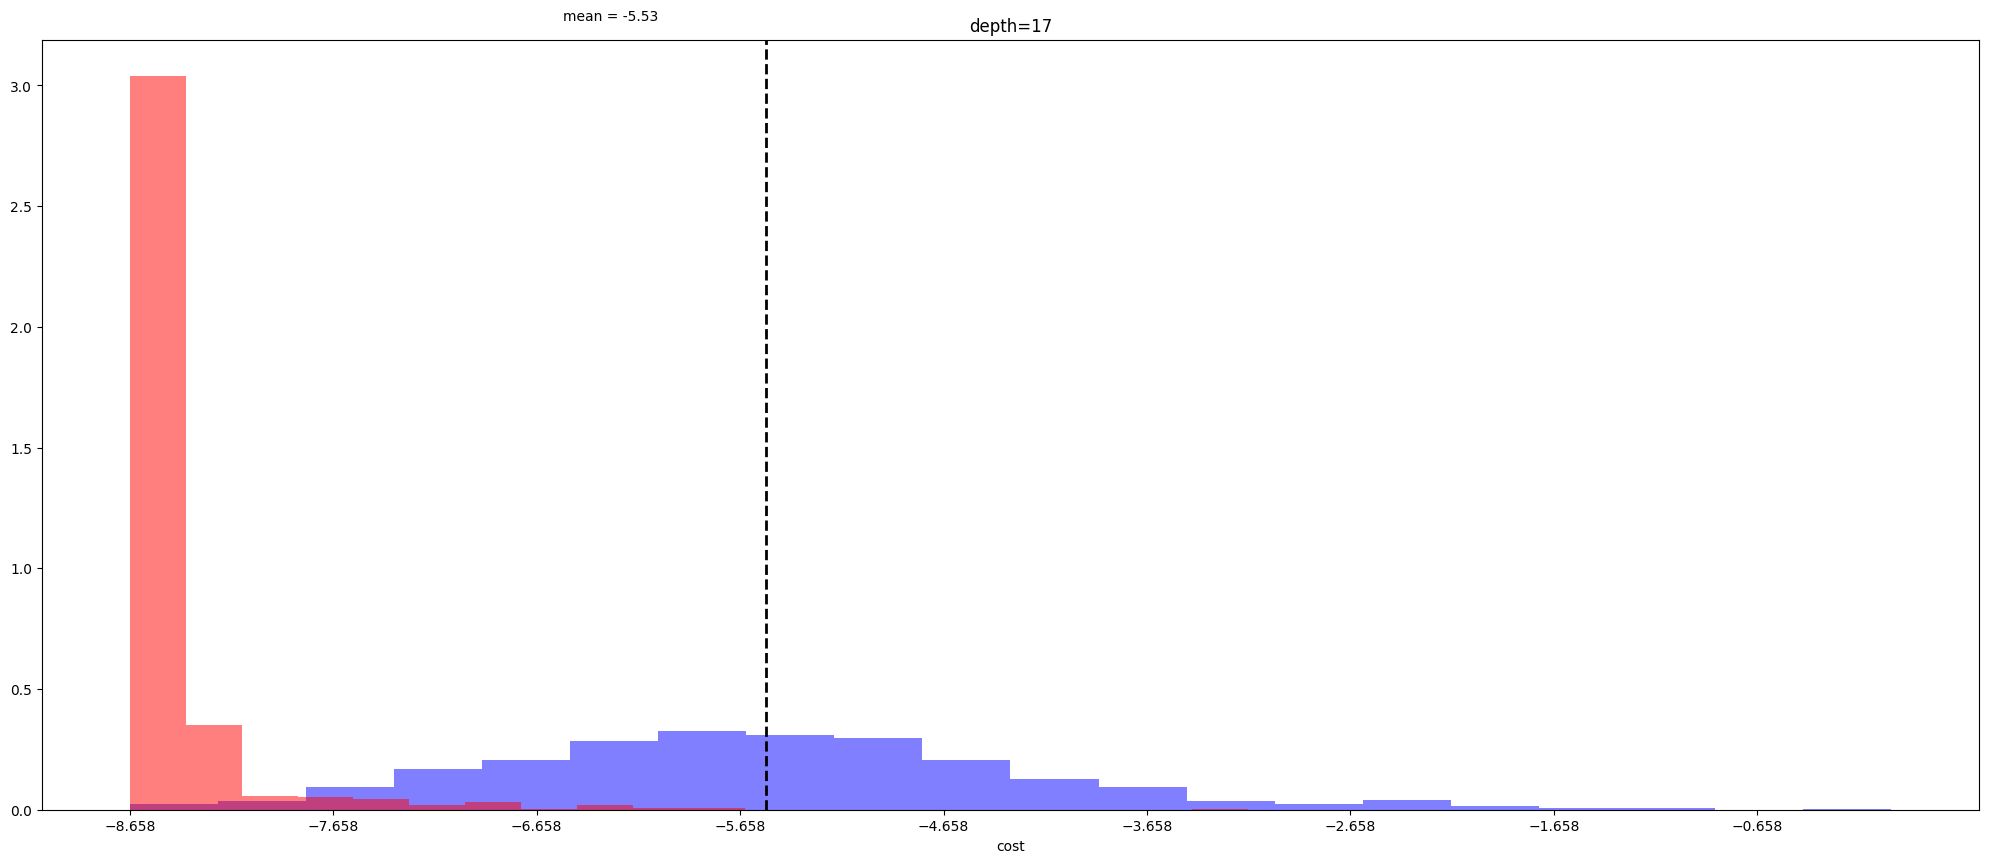

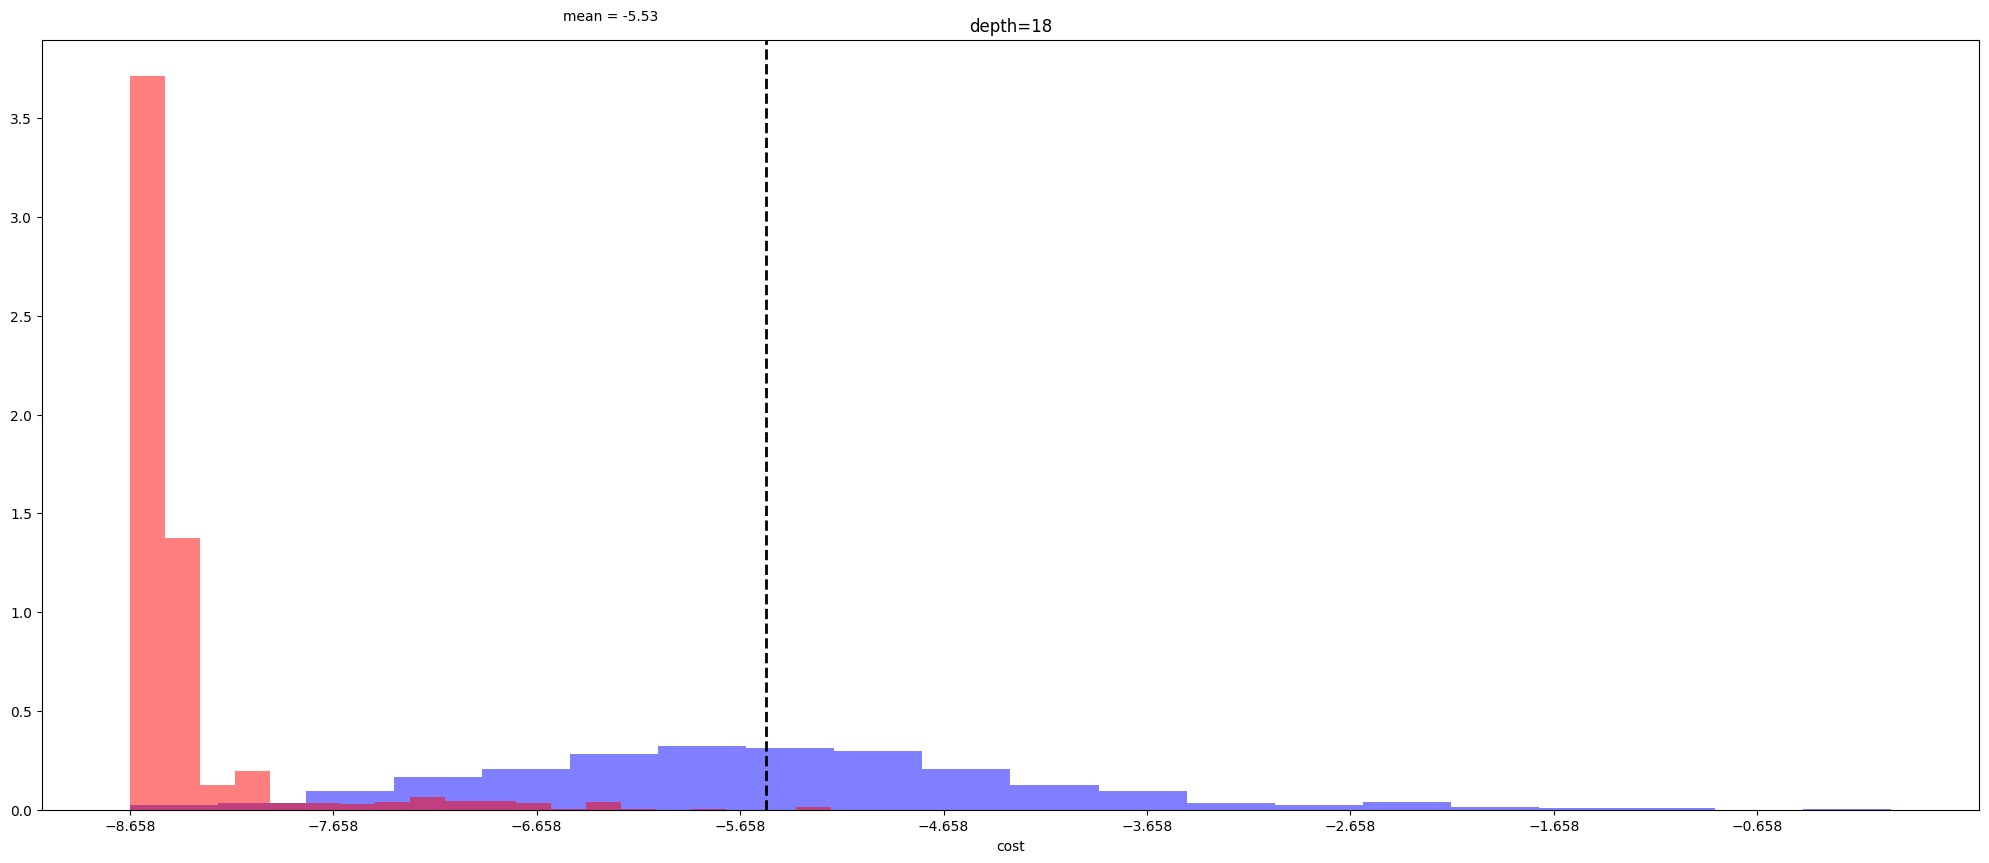

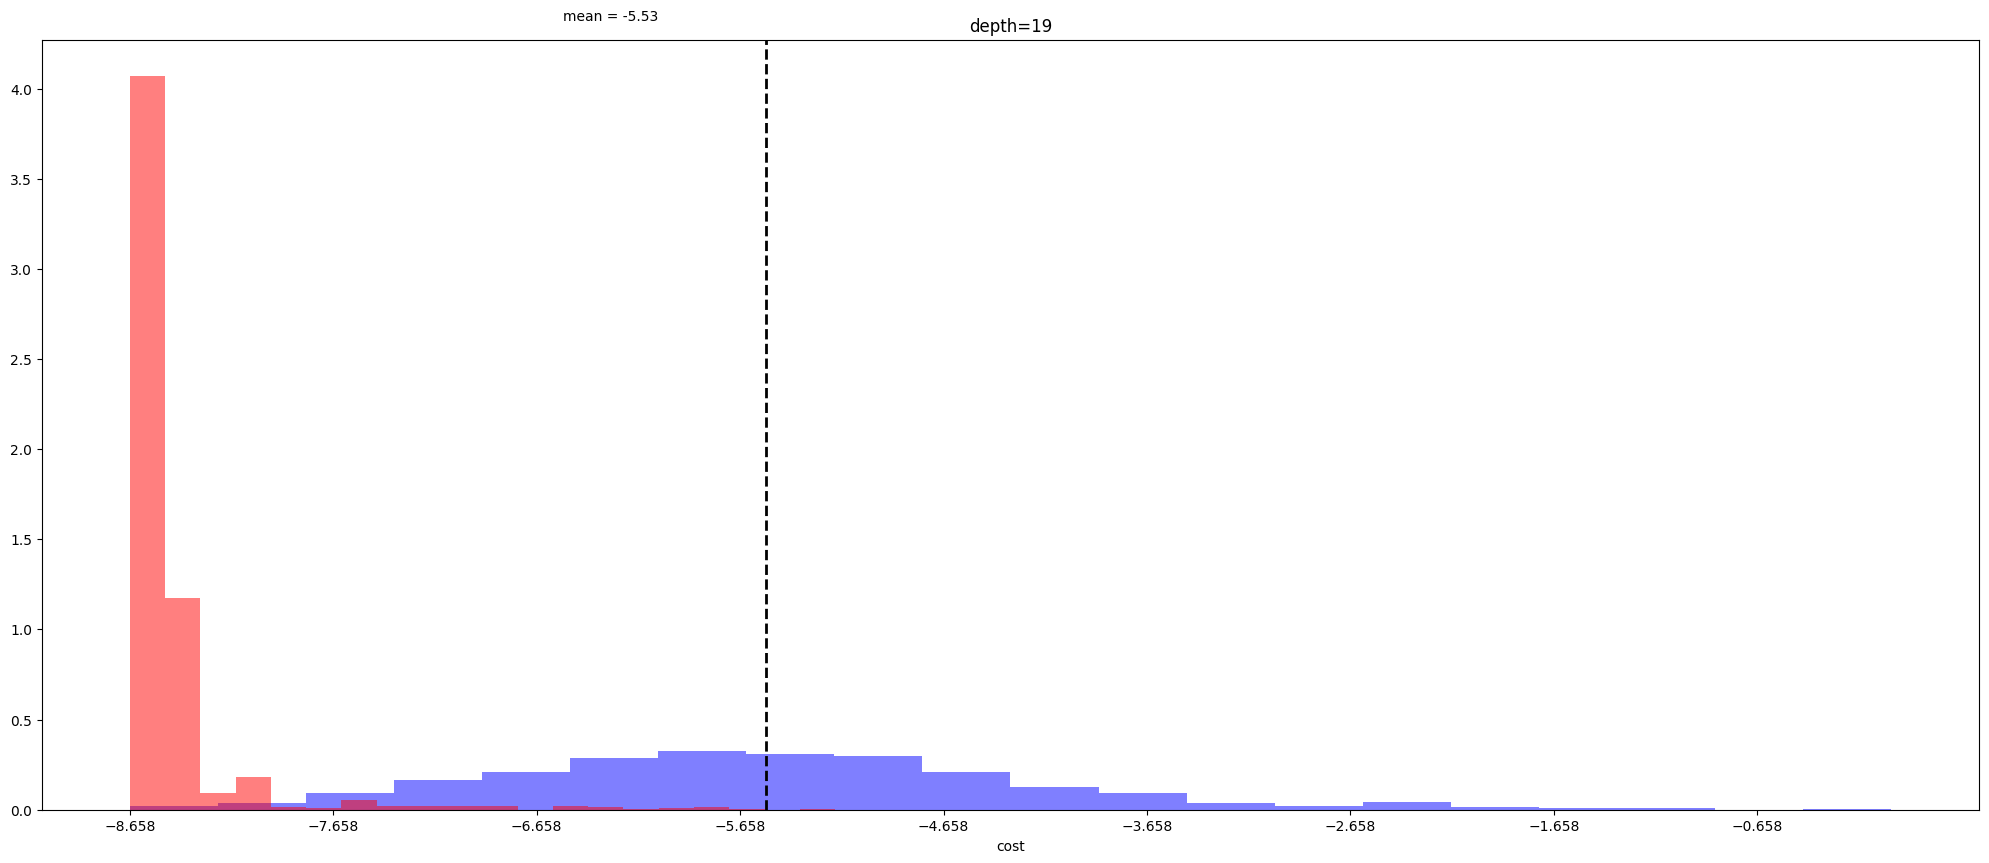

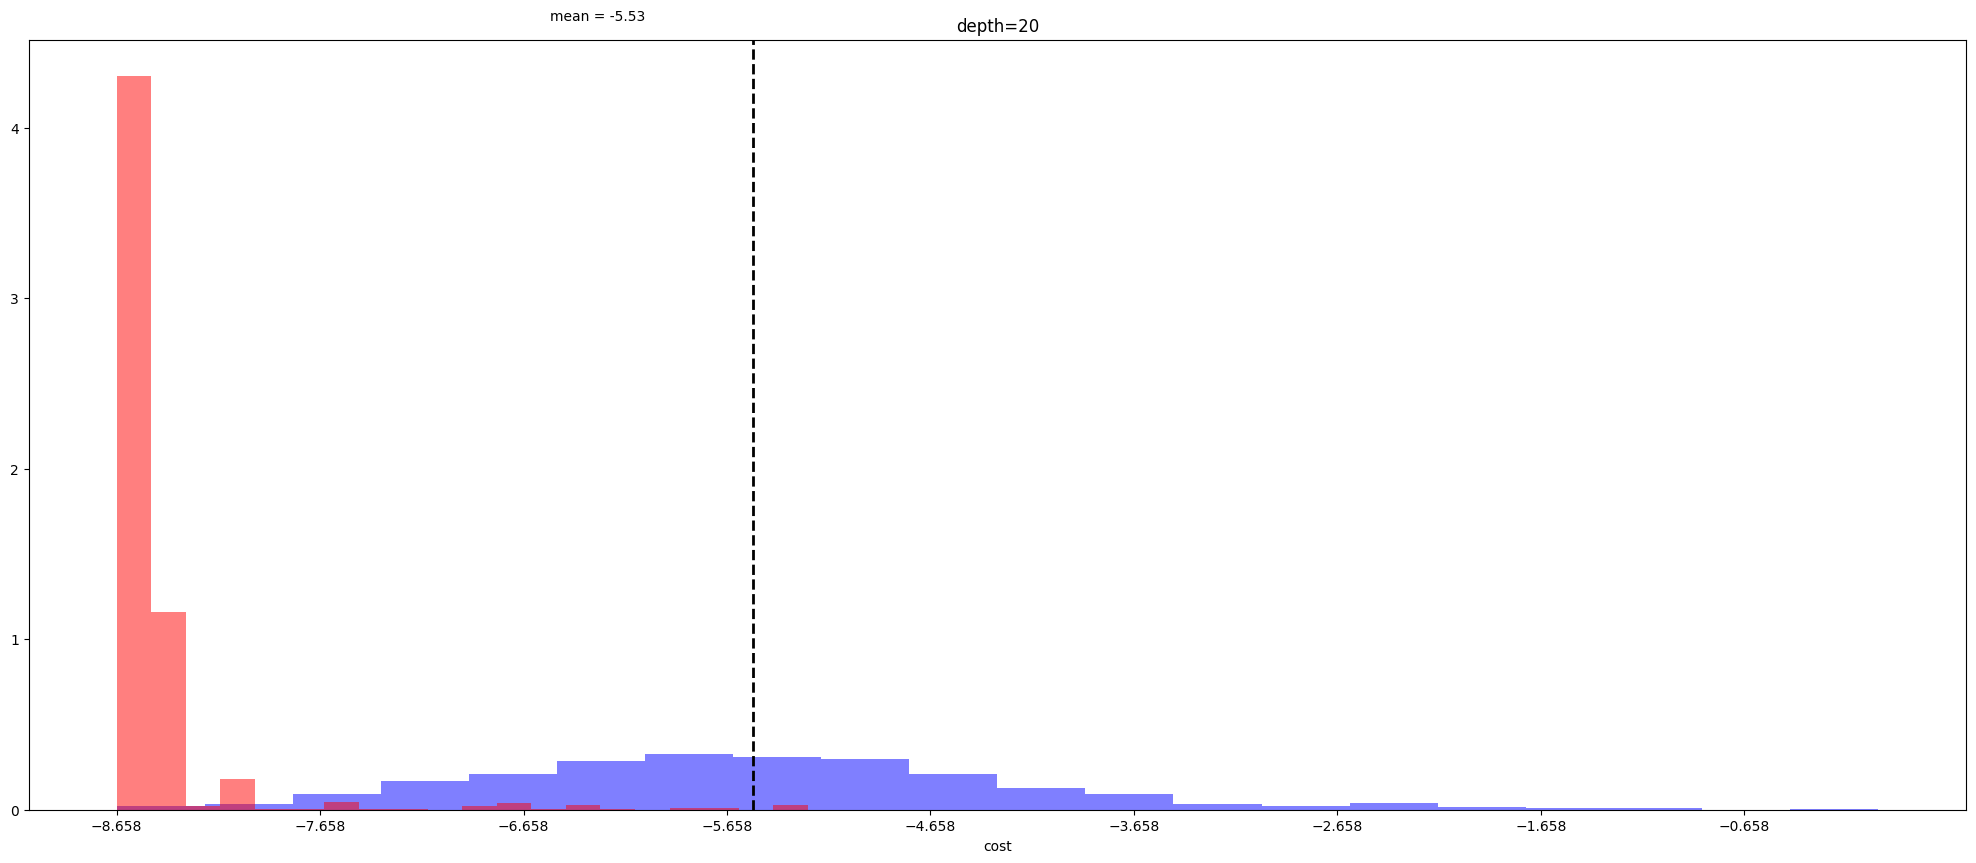

In [30]:
for i in range(1,maxdepth+1):
    hist=qaoamc.hist(qaoamc.angles_hist['d'+str(i)+'_final'], qasm_sim,2**10)
    bins={}
    for key in hist:
        c=-qaoamc.cost(key[::-1])
        bins[c]=bins.get(c,0)
        bins[c]+=hist[key]
    bins=dict(sorted(bins.items()))
    max_val=max(costs)
    min_val=min(costs)

    pl.figure(i, figsize=(25,10))
#     w=np.array(list(bins.values()))
#     c,d,_=pl.hist(bins.keys(),bins=20,weights=w, alpha = 0.5, color= 'r',density=True)
#     pl.clf()
    pl.title("depth="+str(i))
    a,b,_=pl.hist(np.sort(costs), bins=20, alpha = 0.5, color= 'b',density=True)
    w=np.array(list(bins.values()))
    pl.hist(bins.keys(),bins=20,weights=w, alpha = 0.5, color= 'r',density=True)
    min_ylim, max_ylim = pl.ylim()
    max_ylim *=1.025
    mean=np.mean(costs)
    pl.axvline(mean, color='k', linestyle='dashed', linewidth=2)
    _=pl.text(mean-1, max_ylim, 'mean = {:.2f}'.format(mean))
    _=pl.xticks(np.arange(min_val, max_val, step=1))
    pl.xlabel("cost")
    pl.savefig("animation"+str(i).zfill(3))

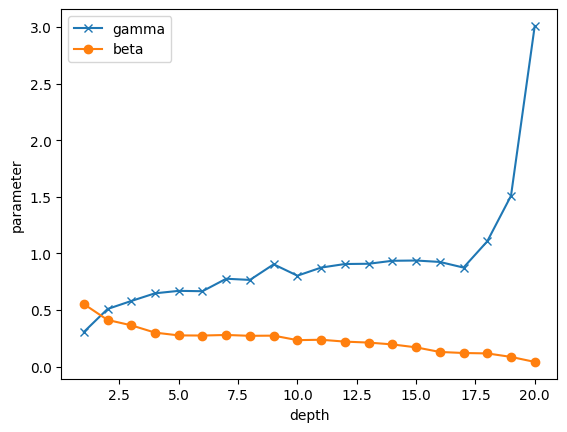

In [14]:
pl.plot(np.arange(1,maxdepth+1),qaoamc.angles_hist['d'+str(maxdepth)+'_final'][::2],"x-",label='gamma')
pl.plot(np.arange(1,maxdepth+1),qaoamc.angles_hist['d'+str(maxdepth)+'_final'][1::2],"o-",label='beta')
_=pl.ylabel('parameter')
_=pl.xlabel('depth')
_=pl.legend()

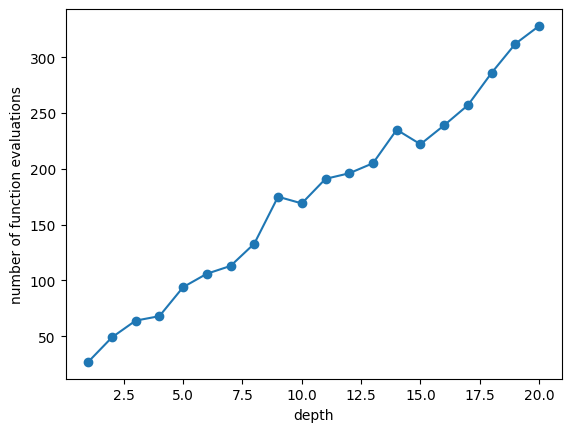

In [15]:
_=pl.plot(np.arange(1,maxdepth+1),qaoamc.num_fval.values(),"o-")
_=pl.ylabel('number of function evaluations')
_=pl.xlabel('depth')

In [16]:
_=pl.plot(np.arange(1,maxdepth+1),np.array(list(qaoamc.num_shots.values()))/np.array(list(qaoamc.num_fval.values())),"o-")
_=pl.ylabel('average number of shots per function evaluation')
_=pl.xlabel('dept
            h')

SyntaxError: EOL while scanning string literal (3080133518.py, line 3)